# Comparison between the ages for the types (after controlling for gender)

Questions

- What are the differences between the ages for the different types
- Do we observe the same changes as globally?


Age effect - General Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [28]:
source("functions.R")

## Data

In [3]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
#pal2 = c(pal2, "white", "black")

In [6]:
# Interactions between ages and types (after controlling gender)
SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1/2,0,0,0), alpha=0.05, test="Wald")
GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1/2,0,0,1), alpha=0.05, test="Wald")
SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1/2,0,0,0,0), alpha=0.05, test="Wald")
GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1/2,0,0,1,0), alpha=0.05, test="Wald")
SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1/2,-1/2,0,0,0), alpha=0.05, test="Wald")
GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1/2,-1/2,0,1,-1), alpha=0.05, test="Wald")

In [7]:
SPF_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2')
GF_samples = c(
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','GF_104w_M_1_2','GF_104w_M_2_2')
to_comp = c("52w VS 8w (SPF)","52w VS 8w (GF)", "104w VS 52w (SPF)", "104w VS 52w (GF)", "104w VS 8w (SPF)", "104w VS 8w (GF)")

In [8]:
annot = as.data.frame(colData(dge)[, c("age", "gender")])

In [8]:
norm_counts_wo_out = counts(dge, normalized=T, replaced = T)
norm_counts_wo_out = norm_counts_wo_out[apply(norm_counts_wo_out, 1, sum) != 0,]
mean_counts = apply(norm_counts_wo_out, 1, mean)
sd_counts = apply(norm_counts_wo_out, 1, sd)
z_scores = (norm_counts_wo_out - mean_counts)/sd_counts
# z_score higher than 3.5 or smaller than -3.5
s = cbind(apply(z_scores > 3.5, 2, sum, na.rm = T), apply(z_scores < -3.5, 2, sum, na.rm = T))
s_perc = 100 * s/dim(norm_counts_wo_out)[1]
apply(s,2,sum)
apply(s_perc,2,min)
apply(s_perc,2,max)

[1] 14447    88

[1] 0.3609066 0.0000000

[1] 4.845773 0.216544

In [20]:
tag_col_order = c(grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE))
tag_annot_col = as.data.frame(colData(dge)[, c("gender", "age","type")])
tag_annot_col$age = factor(tag_annot_col$age,c("8w", "52w", "104w"))

# Differentially expressed genes

In [10]:
age_type_data = list(SPF_52w_8w, GF_52w_8w, SPF_104w_52w, GF_104w_52w, SPF_104w_8w, GF_104w_8w)
names(age_type_data) = to_comp
age_type_deg = extract_diff_expr_genes(age_type_data, "age-effect/age_type/")

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$sign_fc_deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

# Stats

All DEG (Wald padj < 0.05)
52w VS 8w (SPF)   1205                      
52w VS 8w (GF)     556                      
104w VS 52w (SPF) 1439                      
104w VS 52w (GF)  1276                      
104w VS 8w (SPF)  2938                      
104w VS 8w (GF)   2259                      
                  All over-expressed genes (Wald padj < 0.05 & FC > 0)
52w VS 8w (SPF)    718                                                
52w VS 8w (GF)     349                                                
104w VS 52w (SPF)  860                                                
104w VS 52w (GF)   646                                                
104w VS 8w (SPF)  1636                                                
104w VS 8w (GF)   1196                                                
                  All under-expressed genes (Wald padj < 0.05 & FC < 0)
52w VS 8w (SPF)    487                                                 
52w VS 8w (GF)     207                                                 
104w VS 52w (SPF)  579                                                 
104w VS 52w (GF)   630                                                 
104w VS 8w (SPF)  1302                                                 
104w VS 8w (GF)   1063                                                 
                  DEG (Wald padj < 0.05 & abs(FC) >= 1.5)
52w VS 8w (SPF)    574                                   
52w VS 8w (GF)     310                                   
104w VS 52w (SPF)  429                                   
104w VS 52w (GF)   573                                   
104w VS 8w (SPF)  1261                                   
104w VS 8w (GF)   1158                                   
                  Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)
52w VS 8w (SPF)   446                                                
52w VS 8w (GF)    233                                                
104w VS 52w (SPF) 272                                                
104w VS 52w (GF)  189                                                
104w VS 8w (SPF)  847                                                
104w VS 8w (GF)   550                                                
                  Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)
52w VS 8w (SPF)   128                                                  
52w VS 8w (GF)     77                                                  
104w VS 52w (SPF) 157                                                  
104w VS 52w (GF)  384                                                  
104w VS 8w (SPF)  414                                                  
104w VS 8w (GF)   608

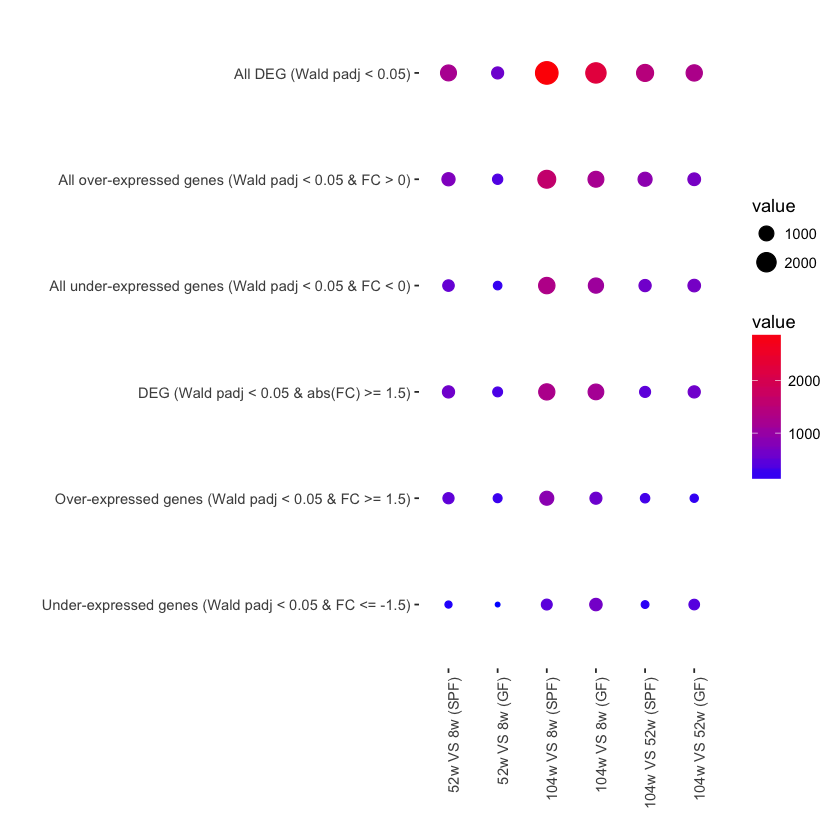

In [11]:
age_type_deg$stat
plot_stat_mat(age_type_deg$stat)

## All DEG (Wald padj < 0.05)

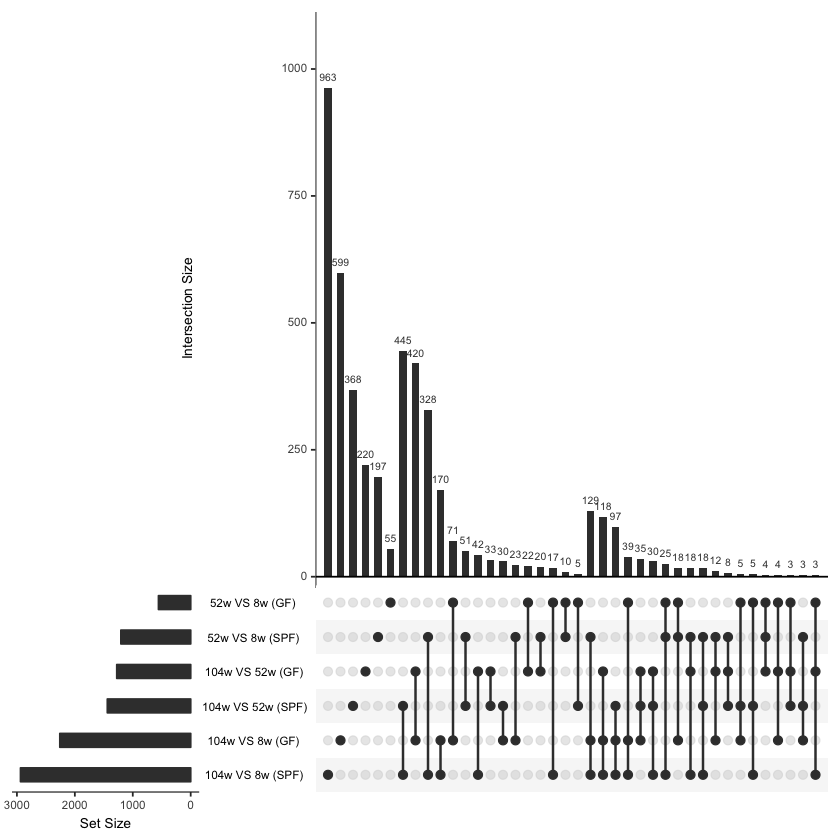

In [12]:
# Differentially expressed genes
upset(as.data.frame(age_type_deg$deg),nsets = 6)

## DEG (Wald padj < 0.05 & abs(FC) > 1.5)

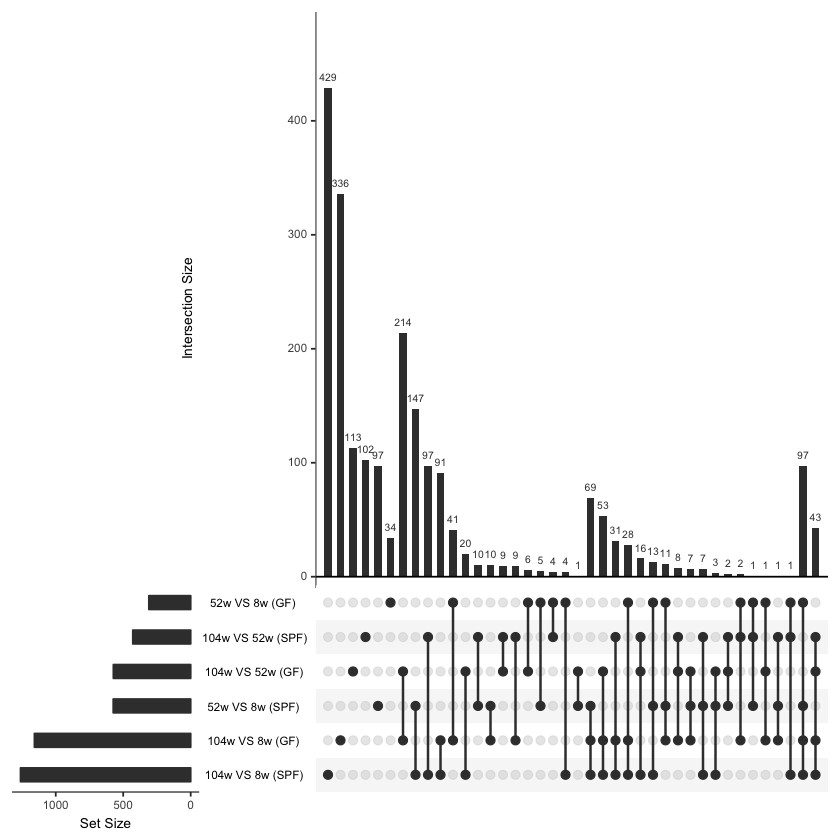

In [13]:
upset(as.data.frame(1*(!is.na(age_type_deg$sign_fc_deg))),nsets = 6)

# DEG (Wald padj < 0.05 & abs(FC) > 1.5)

## Log2FC

comp        type
52w VS 8w (SPF)   52w VS 8w   SPF 
52w VS 8w (GF)    52w VS 8w   GF  
104w VS 52w (SPF) 104w VS 52w SPF 
104w VS 52w (GF)  104w VS 52w GF  
104w VS 8w (SPF)  104w VS 8w  SPF 
104w VS 8w (GF)   104w VS 8w  GF

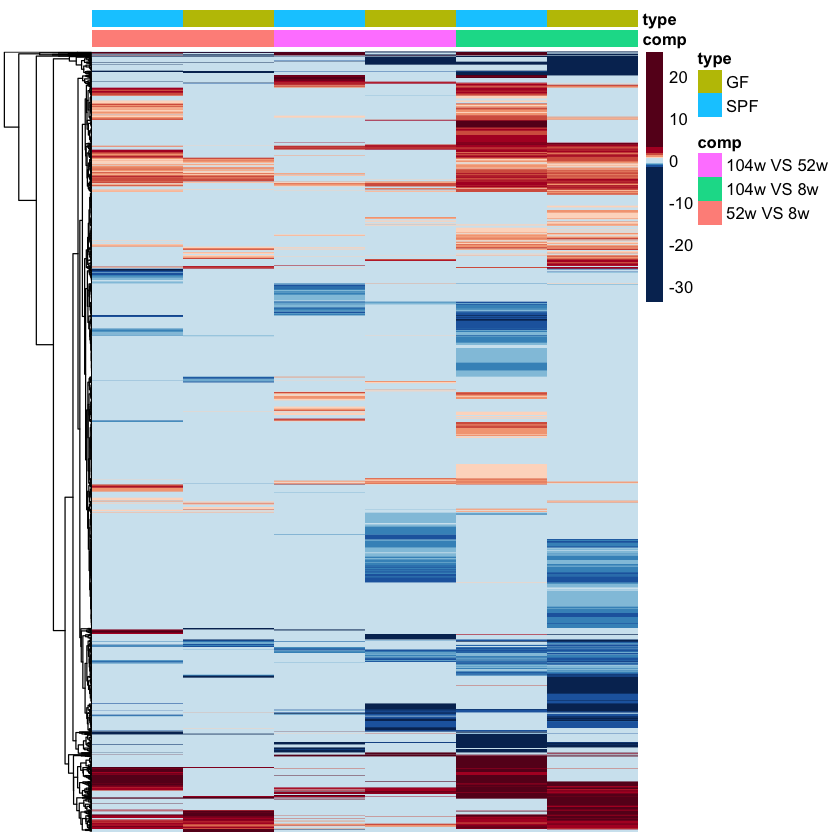

In [14]:
fc_annot = data.frame(comp = c(rep("52w VS 8w",2), rep("104w VS 52w",2), rep("104w VS 8w",2)),
                     type = rep(c("SPF","GF"),3))
rownames(fc_annot) = colnames(age_type_deg$sign_fc_deg)
fc_annot
plot_fc_heatmap(age_type_deg$sign_fc_deg, fc_annot)

## Z-score

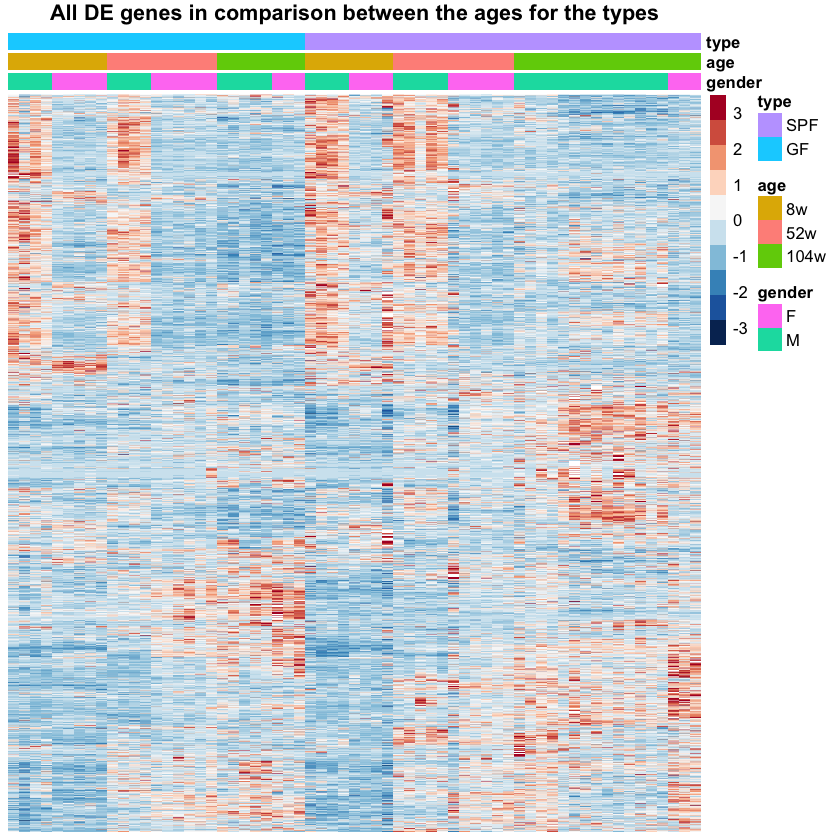

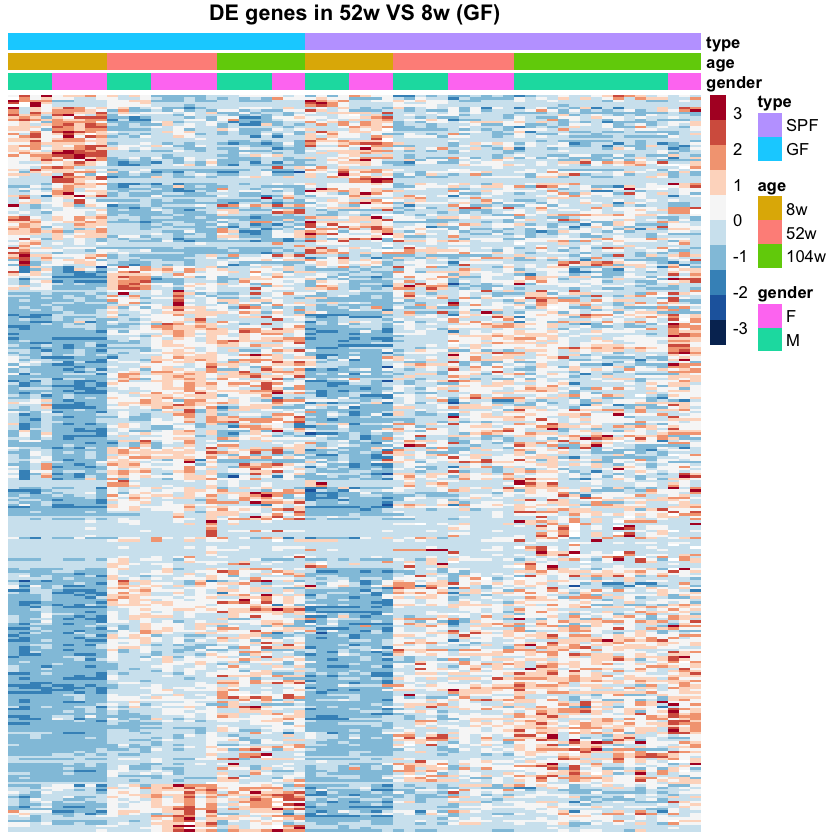

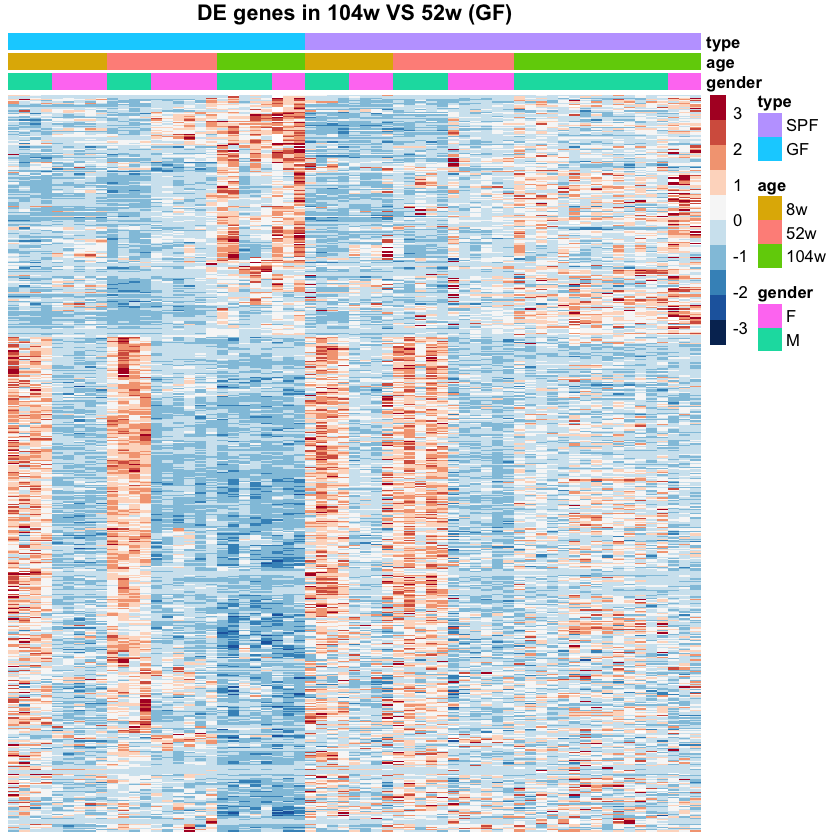

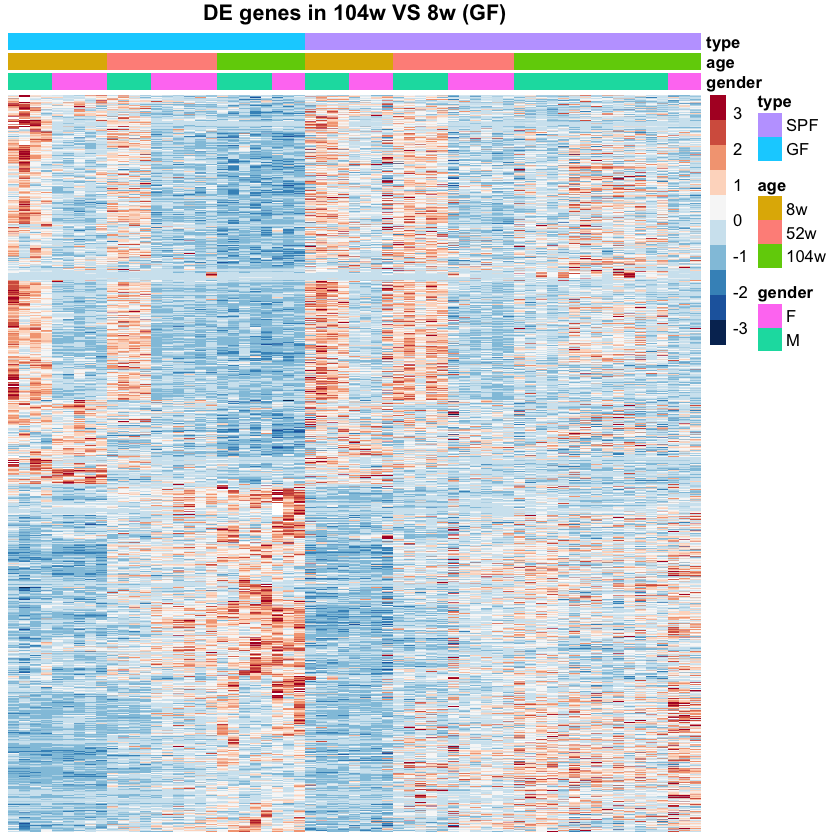

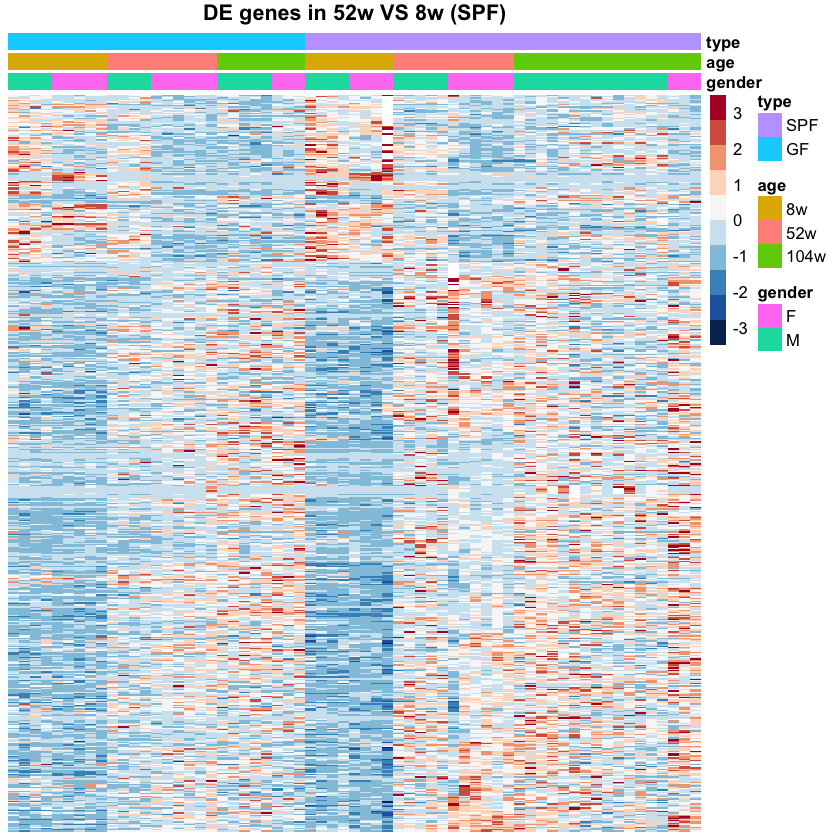

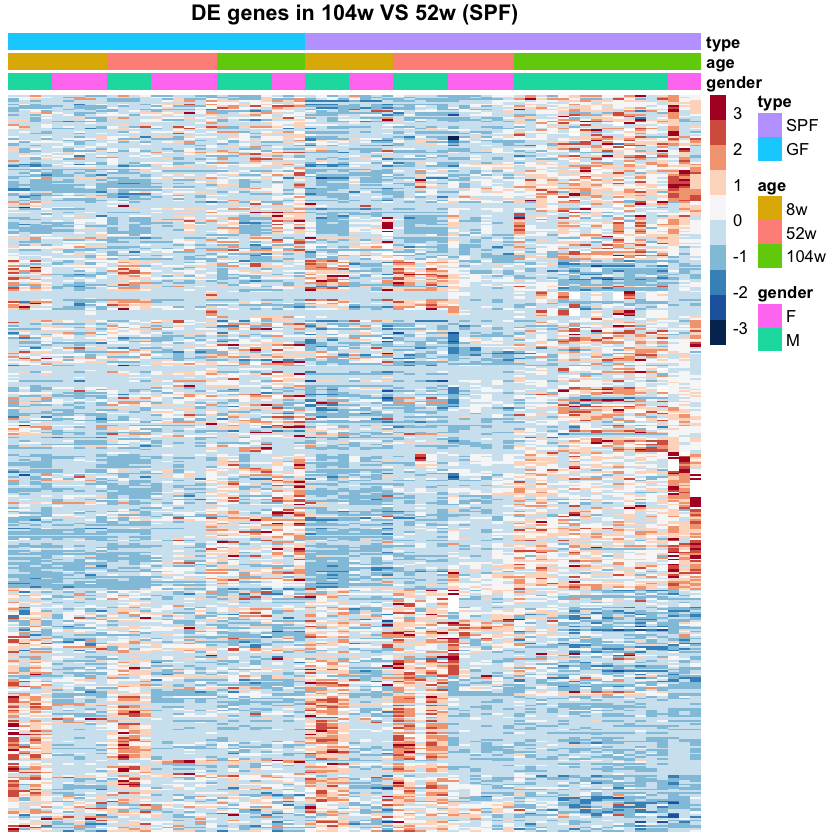

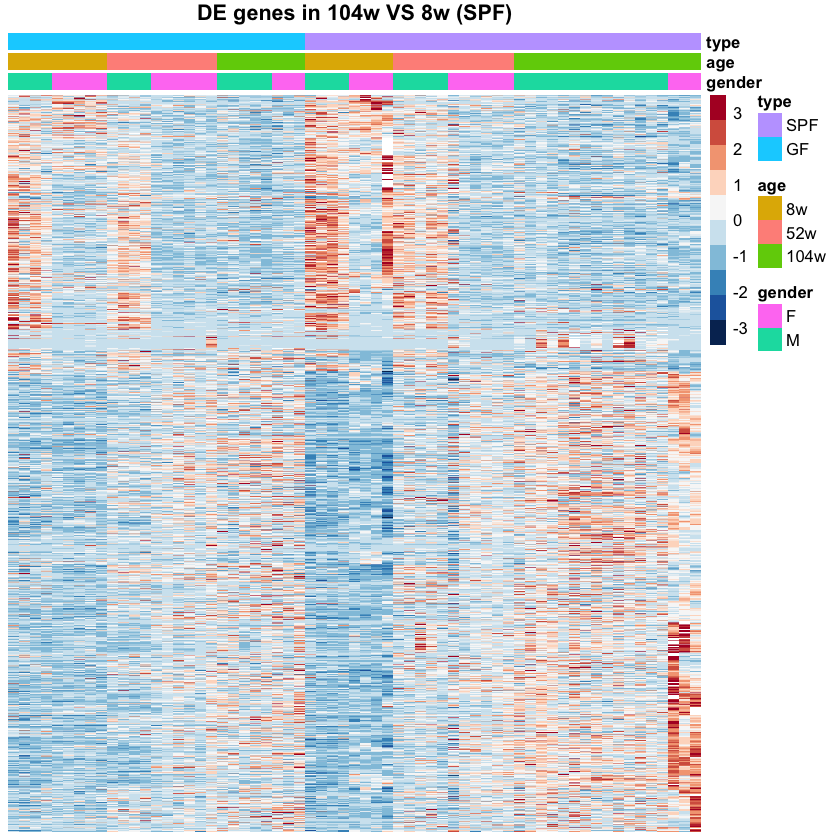

In [21]:
plot_z_score_heatmap(z_scores,
                     rownames(age_type_deg$sign_fc_deg),
                     tag_col_order,
                     tag_annot_col,
                     "All DE genes in comparison between the ages for the types",
                     tag_col_order)

tga_col_order = c(grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE))

comps = list(
    "52w VS 8w (GF)" = c(grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 52w (GF)" = c(grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 8w (GF)" = c(grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "52w VS 8w (SPF)" = c(grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SP_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SP_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 52w (SPF)" = c(grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SP_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SP_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 8w (SPF)" = c(grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SP_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SP_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE))    
)

for(comp in names(comps)){
    plot_z_score_heatmap(z_scores,
                     rownames(age_type_deg$sign_fc_deg)[!is.na(age_type_deg$sign_fc_deg[,comp])],
                     tag_col_order,
                     tag_annot_col,
                     paste("DE genes in", comp),
                     comps[[comp]])
}

# Co-expression (WGCNA)

## DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated


 | 52w VS 8w | 104w VS 52w | 104w VS 8w
--- | --- | --- | ---
SPF |  |  | 
GF  |  |  | 

In [22]:
#par(mfrow=c(2,3),mar=c(0,0,0,0))
#col_52w_vs_8w_SPF = get_deg_colors(age_type_deg, "52w VS 8w (SPF)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_52w_vs_8w_SPF, pal2, layout, add_legend = FALSE)
#col_52w_vs_8w_GF = get_deg_colors(age_type_deg, "104w VS 52w (SPF)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_52w_vs_8w_GF, pal2, layout, add_legend = FALSE)
#col_104w_vs_52w_SPF = get_deg_colors(age_type_deg, "104w VS 8w (SPF)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_104w_vs_52w_SPF, pal2, layout, add_legend = FALSE)
#col_104w_vs_52w_GF = get_deg_colors(age_type_deg, "52w VS 8w (GF)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_104w_vs_52w_GF, pal2, layout, add_legend = FALSE)
#col_104w_vs_8w_SPF = get_deg_colors(age_type_deg, "104w VS 52w (SPF)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_104w_vs_8w_SPF, pal2, layout, add_legend = FALSE)
#col_104w_vs_8w_GF = get_deg_colors(age_type_deg, "104w VS 8w (SPF)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_104w_vs_8w_GF, pal2, layout, add_legend = FALSE)

## Z-score in modules

In [23]:
mod_pal = pal2
names(mod_pal) = paste("ME", names(pal2), sep='')
names(mod_pal) = replace(names(mod_pal), which(names(mod_pal) == 'ME0'), "No module")
annot_colors = list(
    module = mod_pal
)

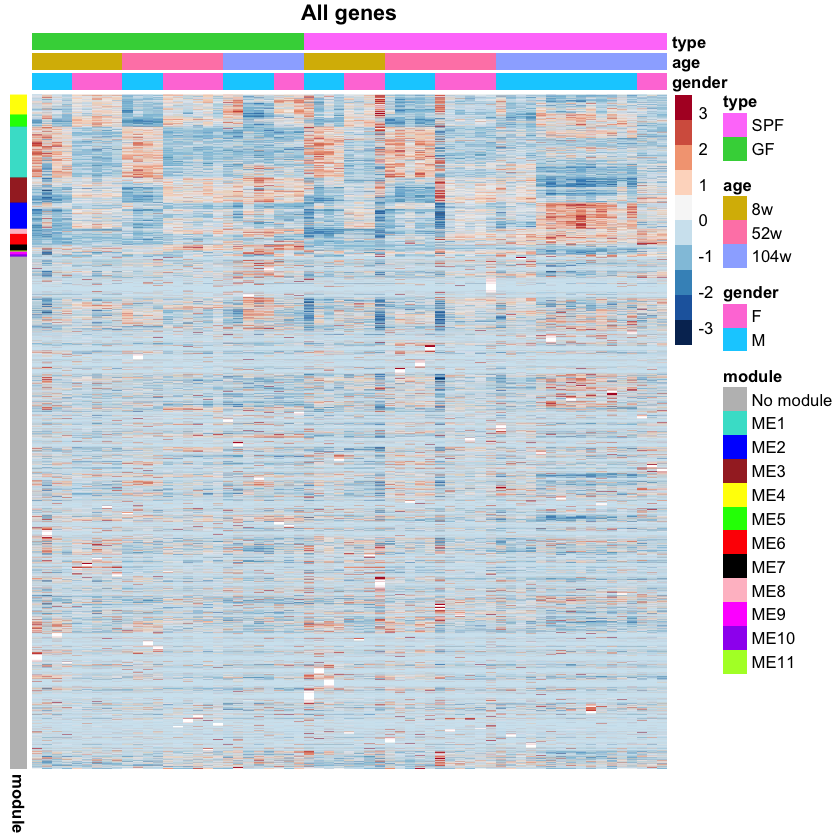

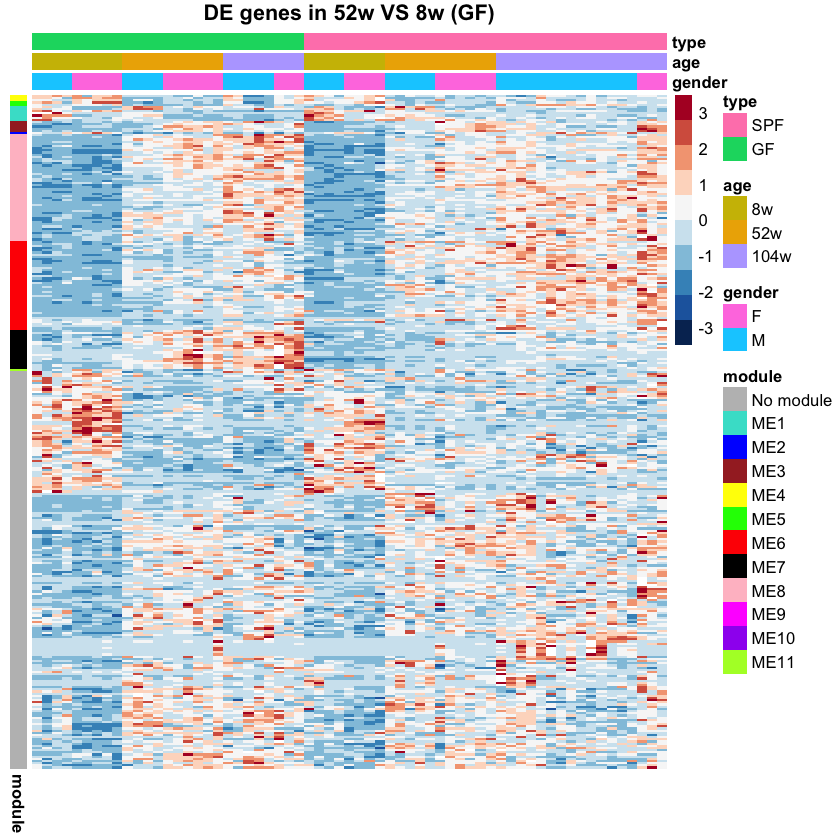

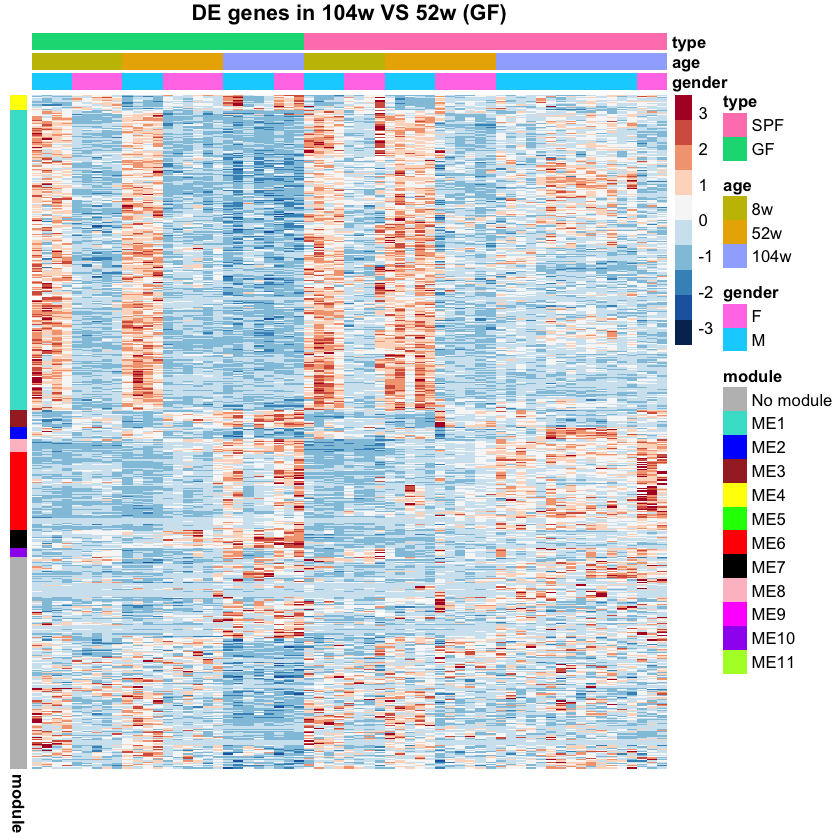

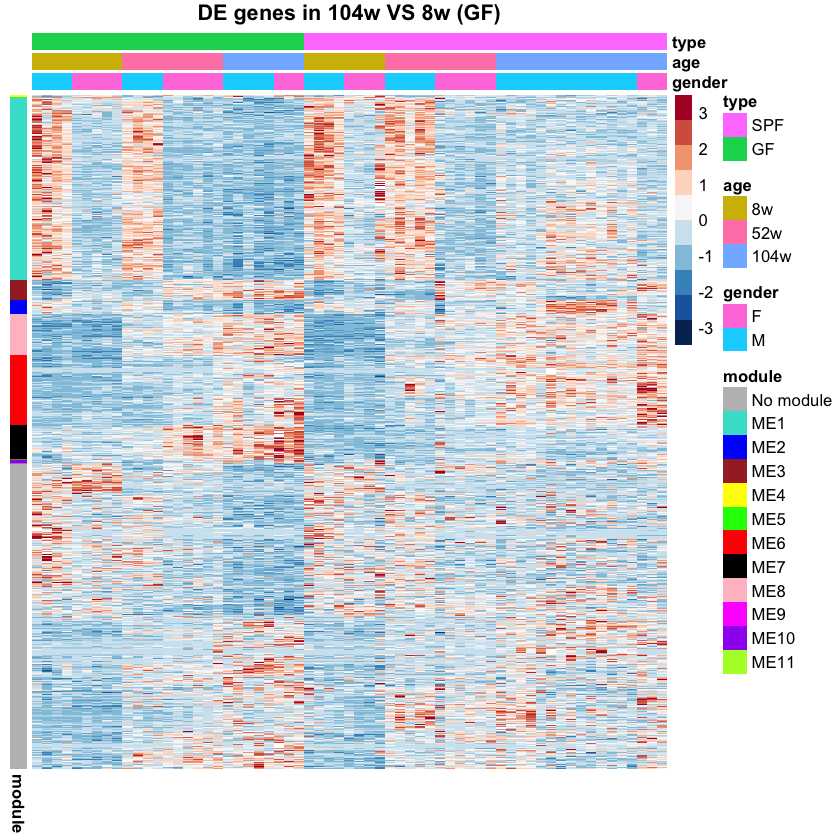

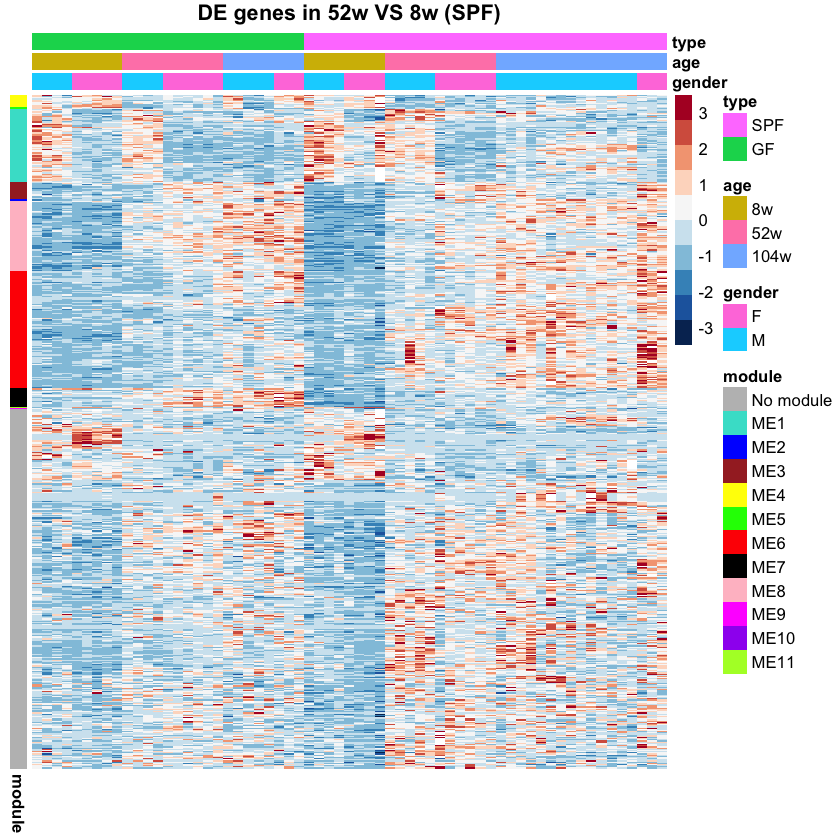

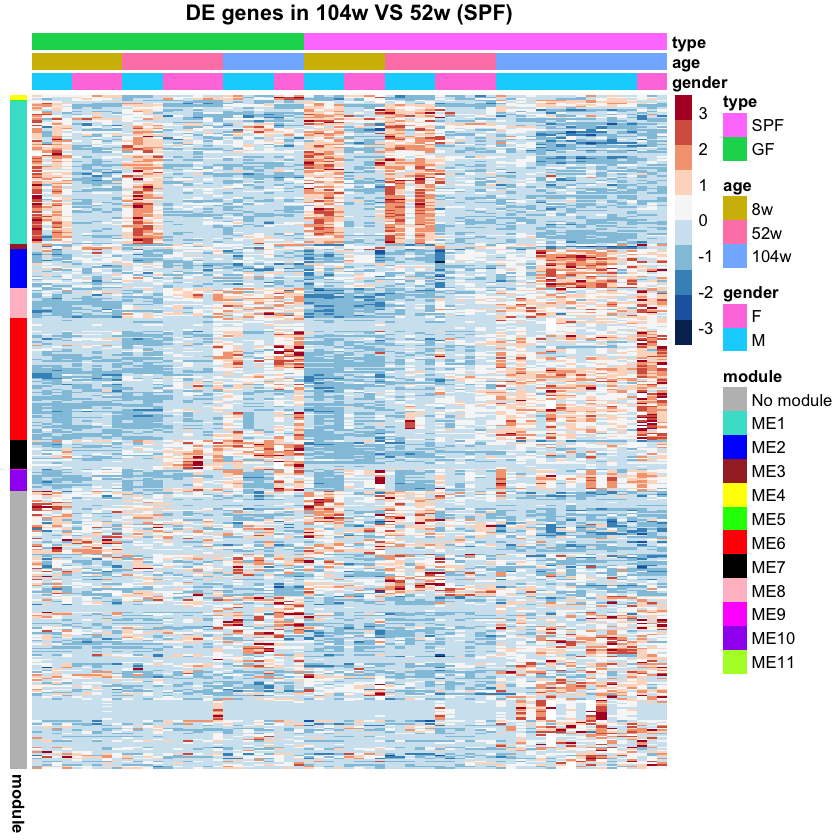

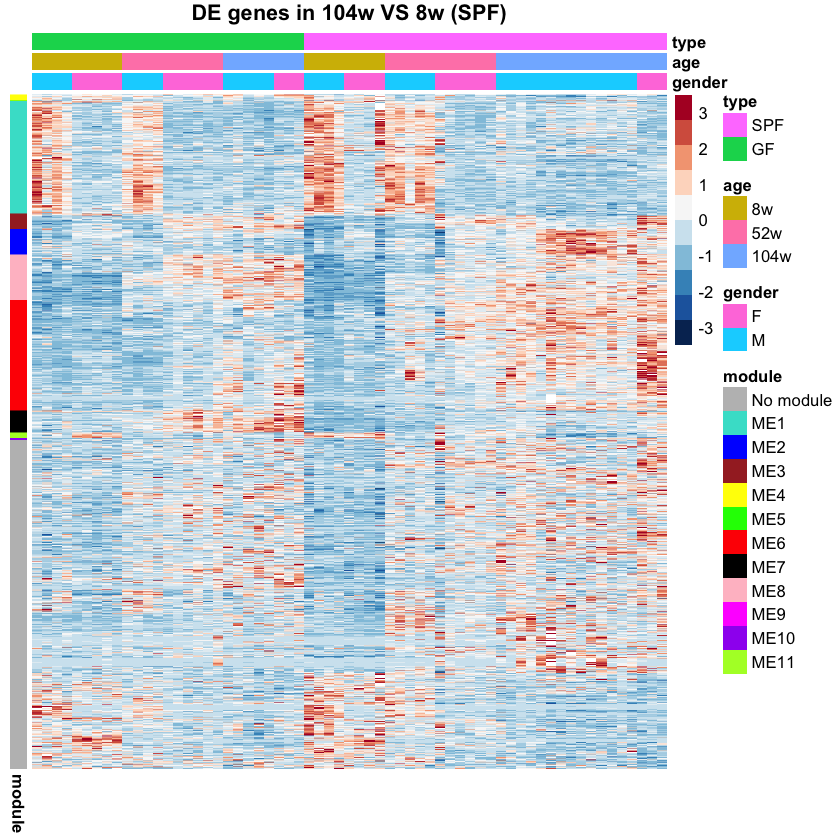

In [26]:
plot_z_score_heatmap_with_modules(z_scores,
                                  rownames(z_scores),
                                  tag_col_order,
                                  tag_annot_col,
                                  "All genes")
comps = c("52w VS 8w (GF)","104w VS 52w (GF)","104w VS 8w (GF)",
          "52w VS 8w (SPF)", "104w VS 52w (SPF)", "104w VS 8w (SPF)")
for(comp in comps){
    plot_z_score_heatmap_with_modules(z_scores,
                                     rownames(age_type_deg$sign_fc_deg)[!is.na(age_type_deg$sign_fc_deg[,comp])],
                                     tag_col_order,
                                     tag_annot_col,
                                     paste("DE genes in", comp))
}

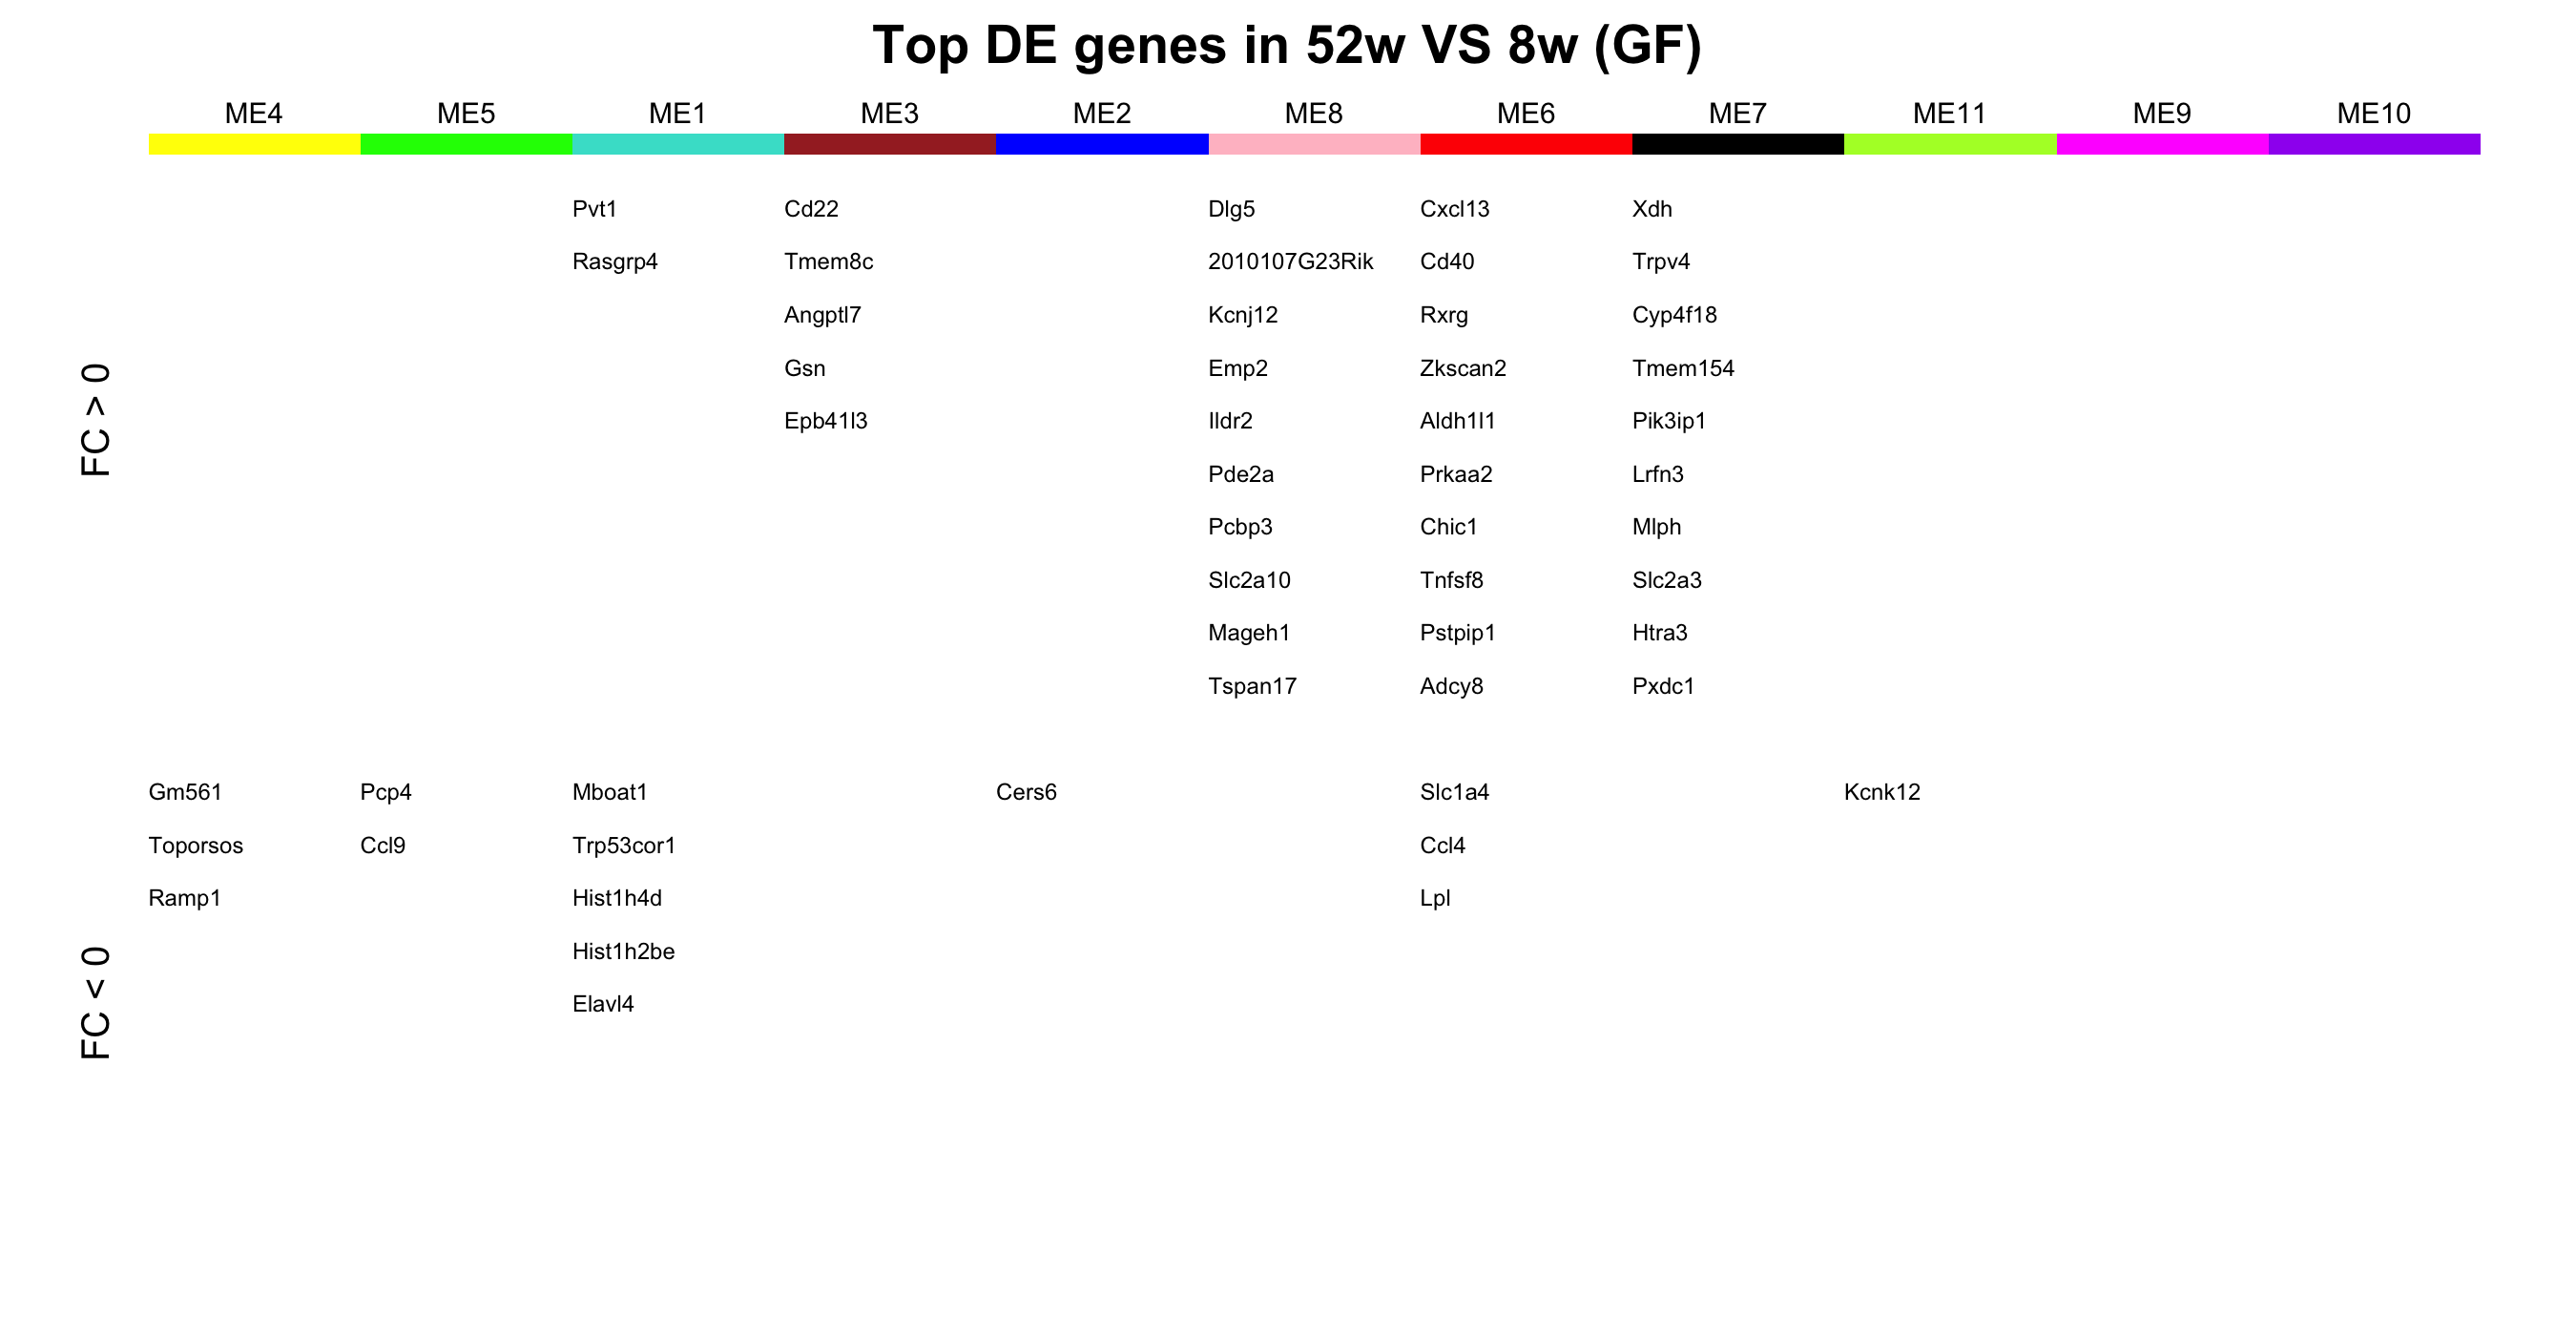

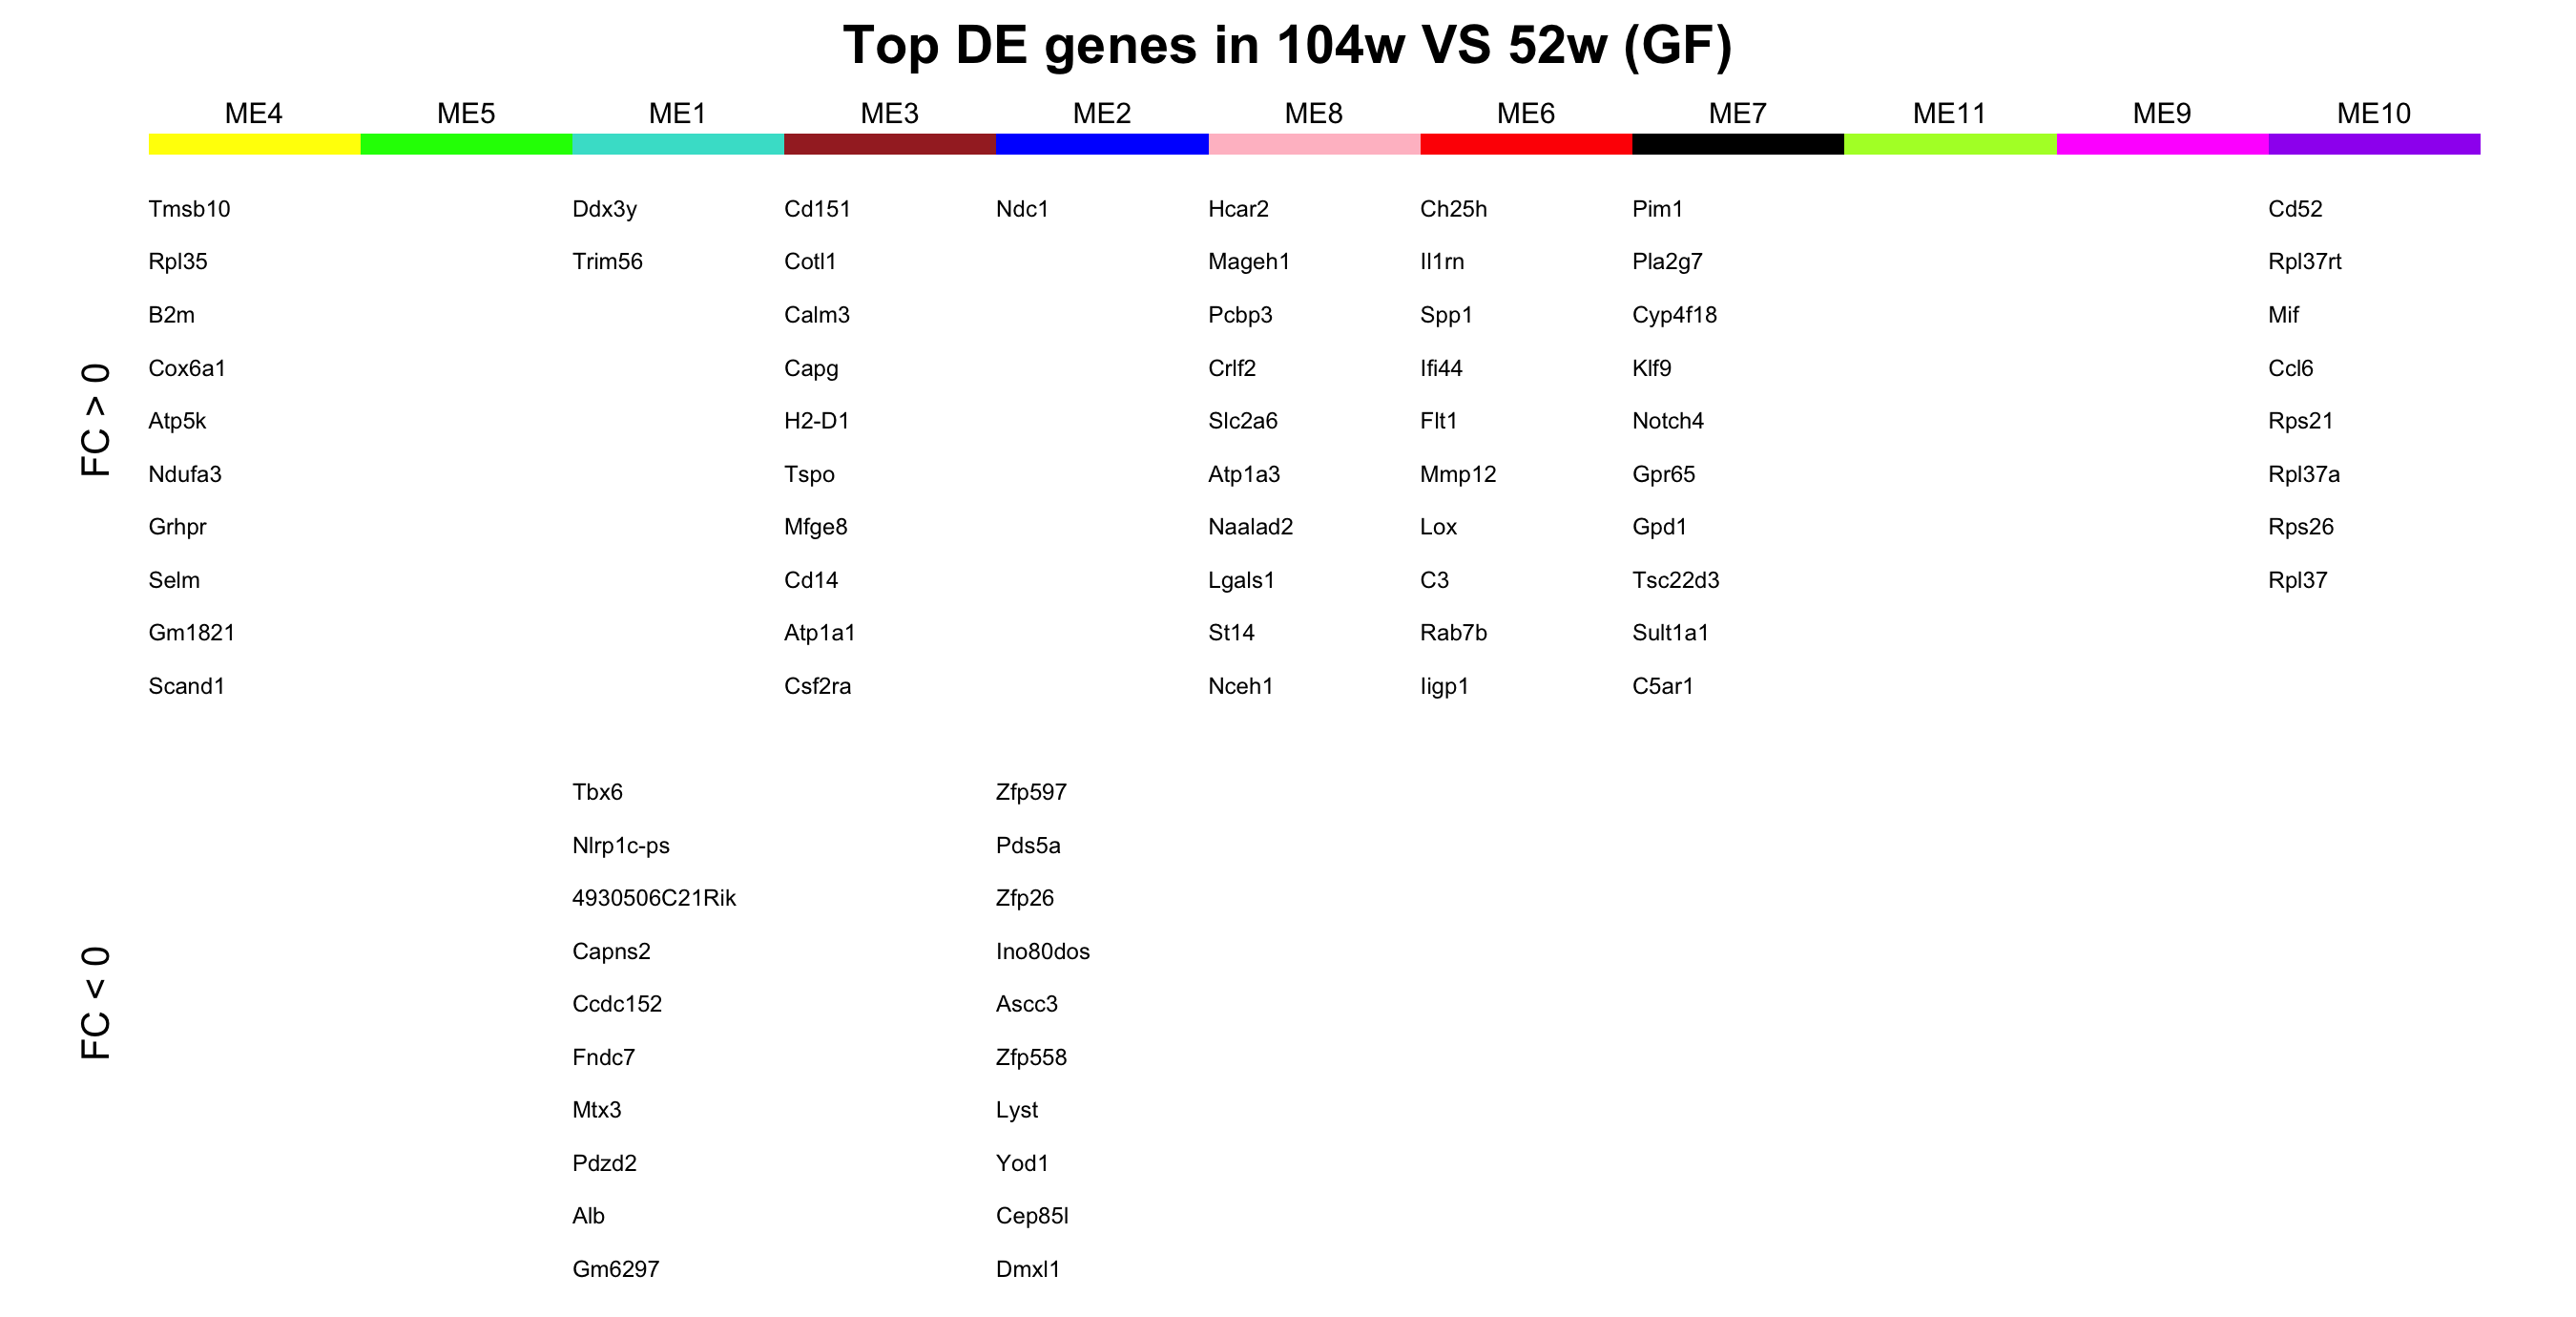

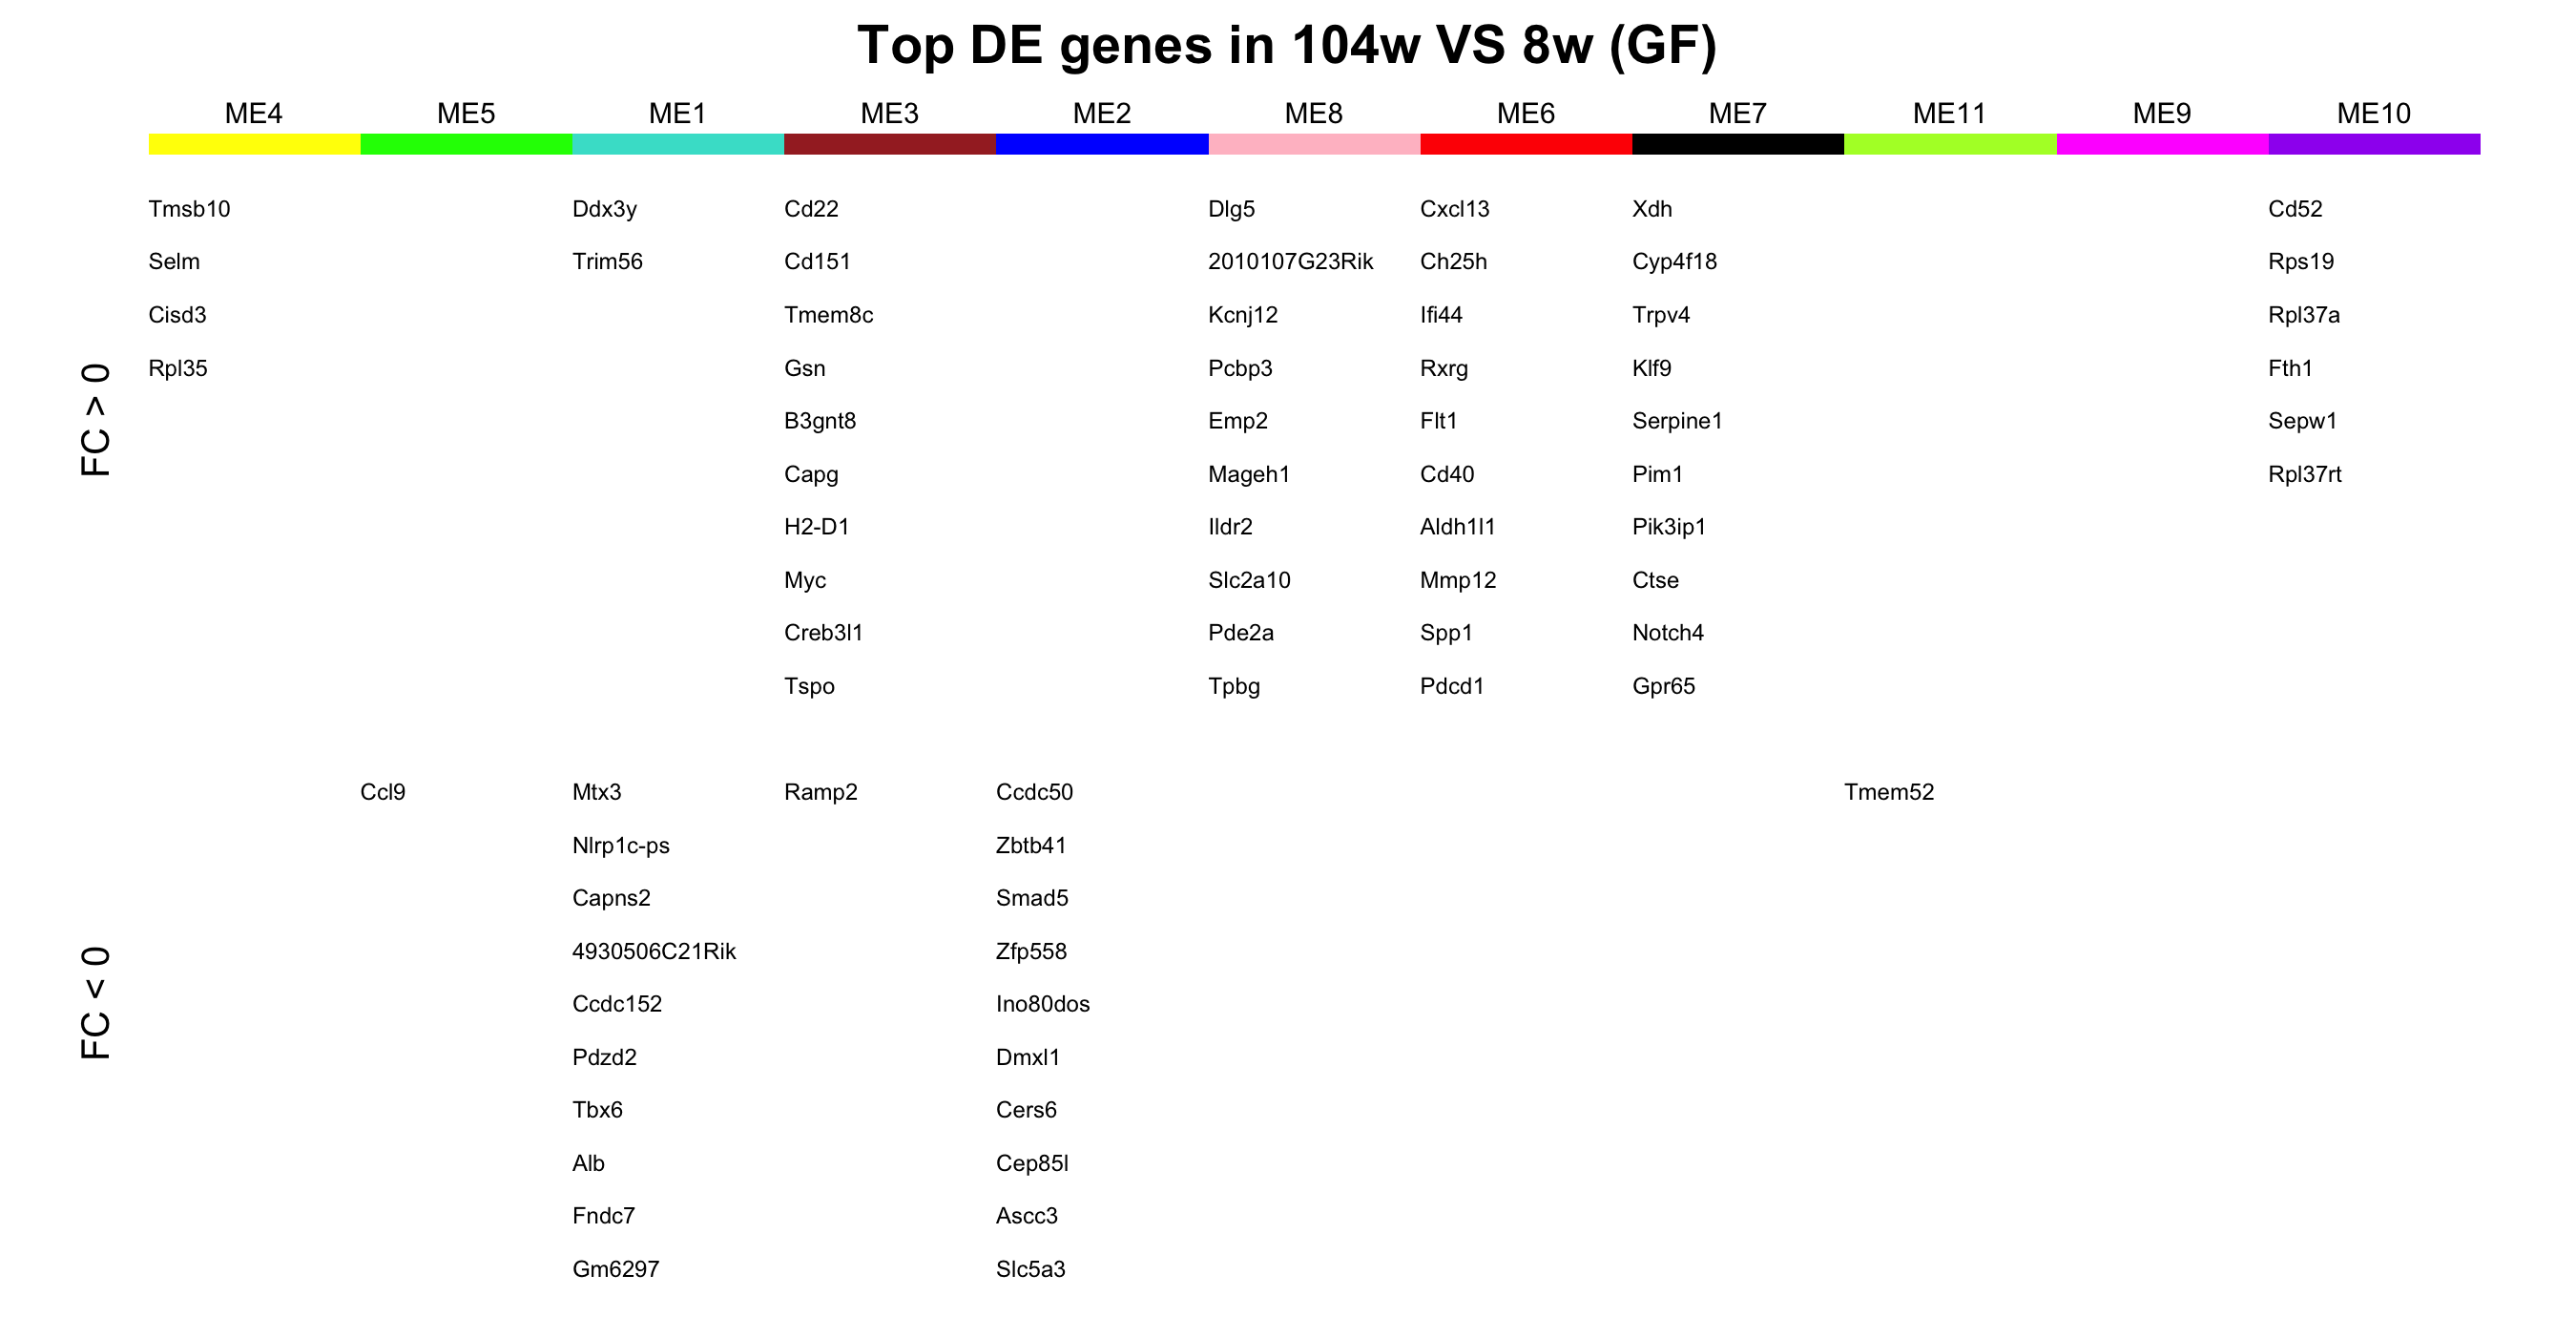

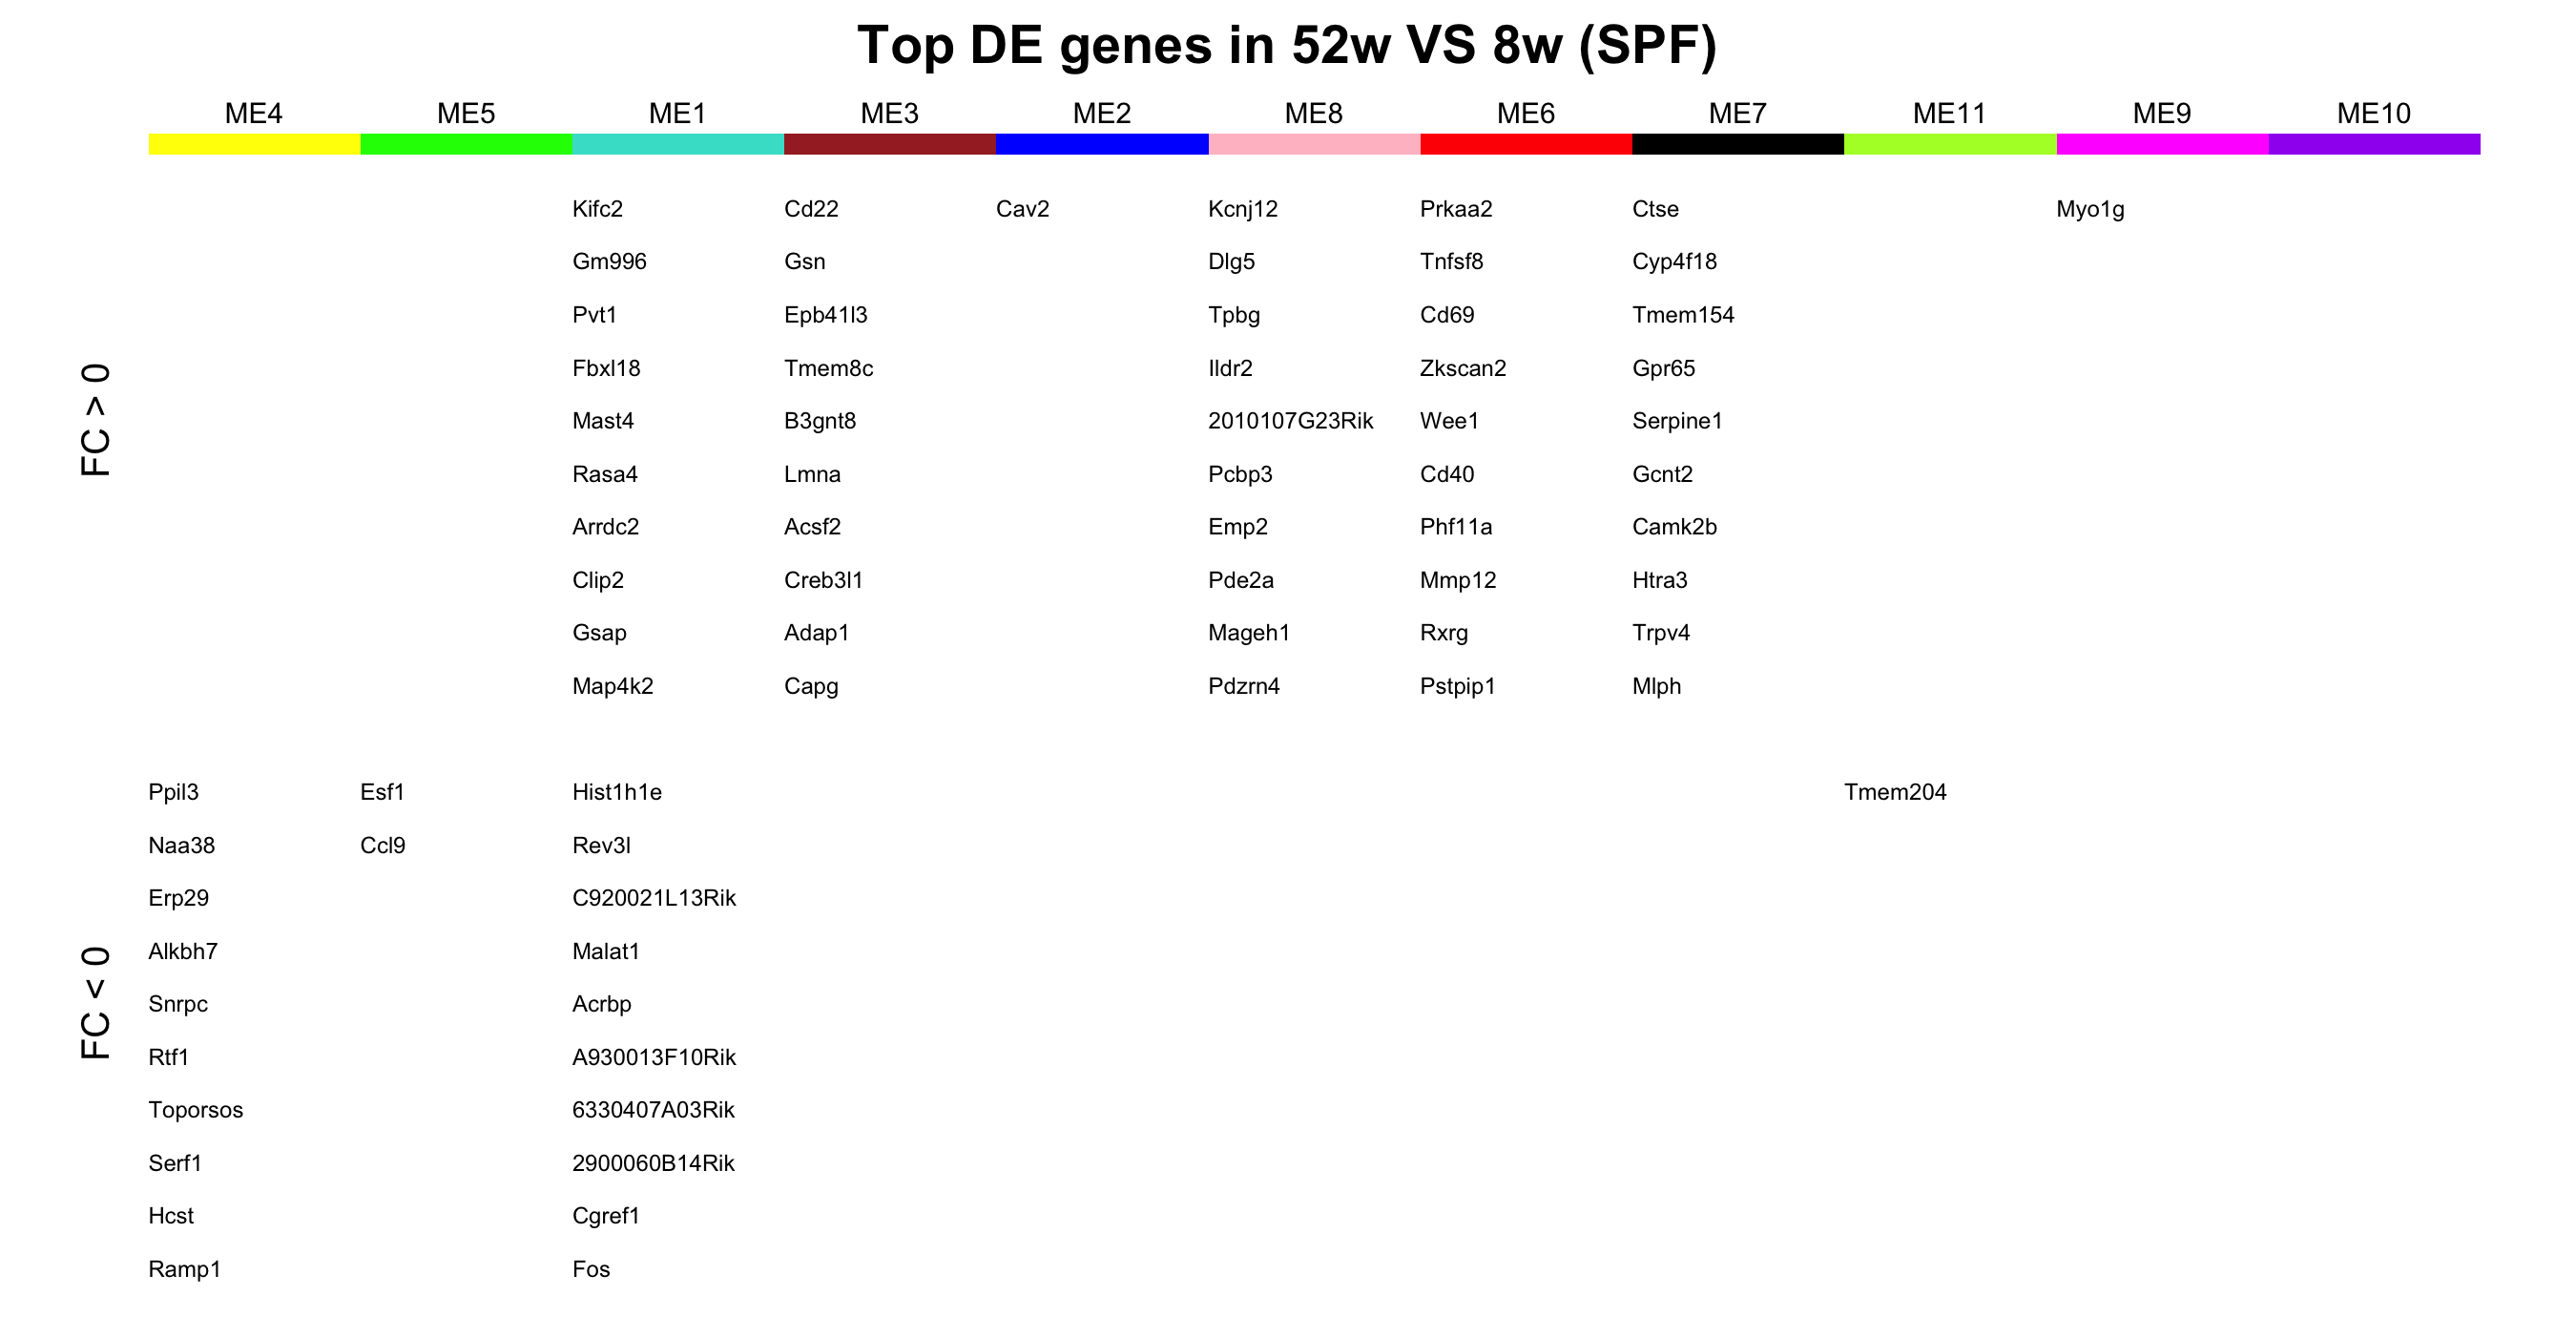

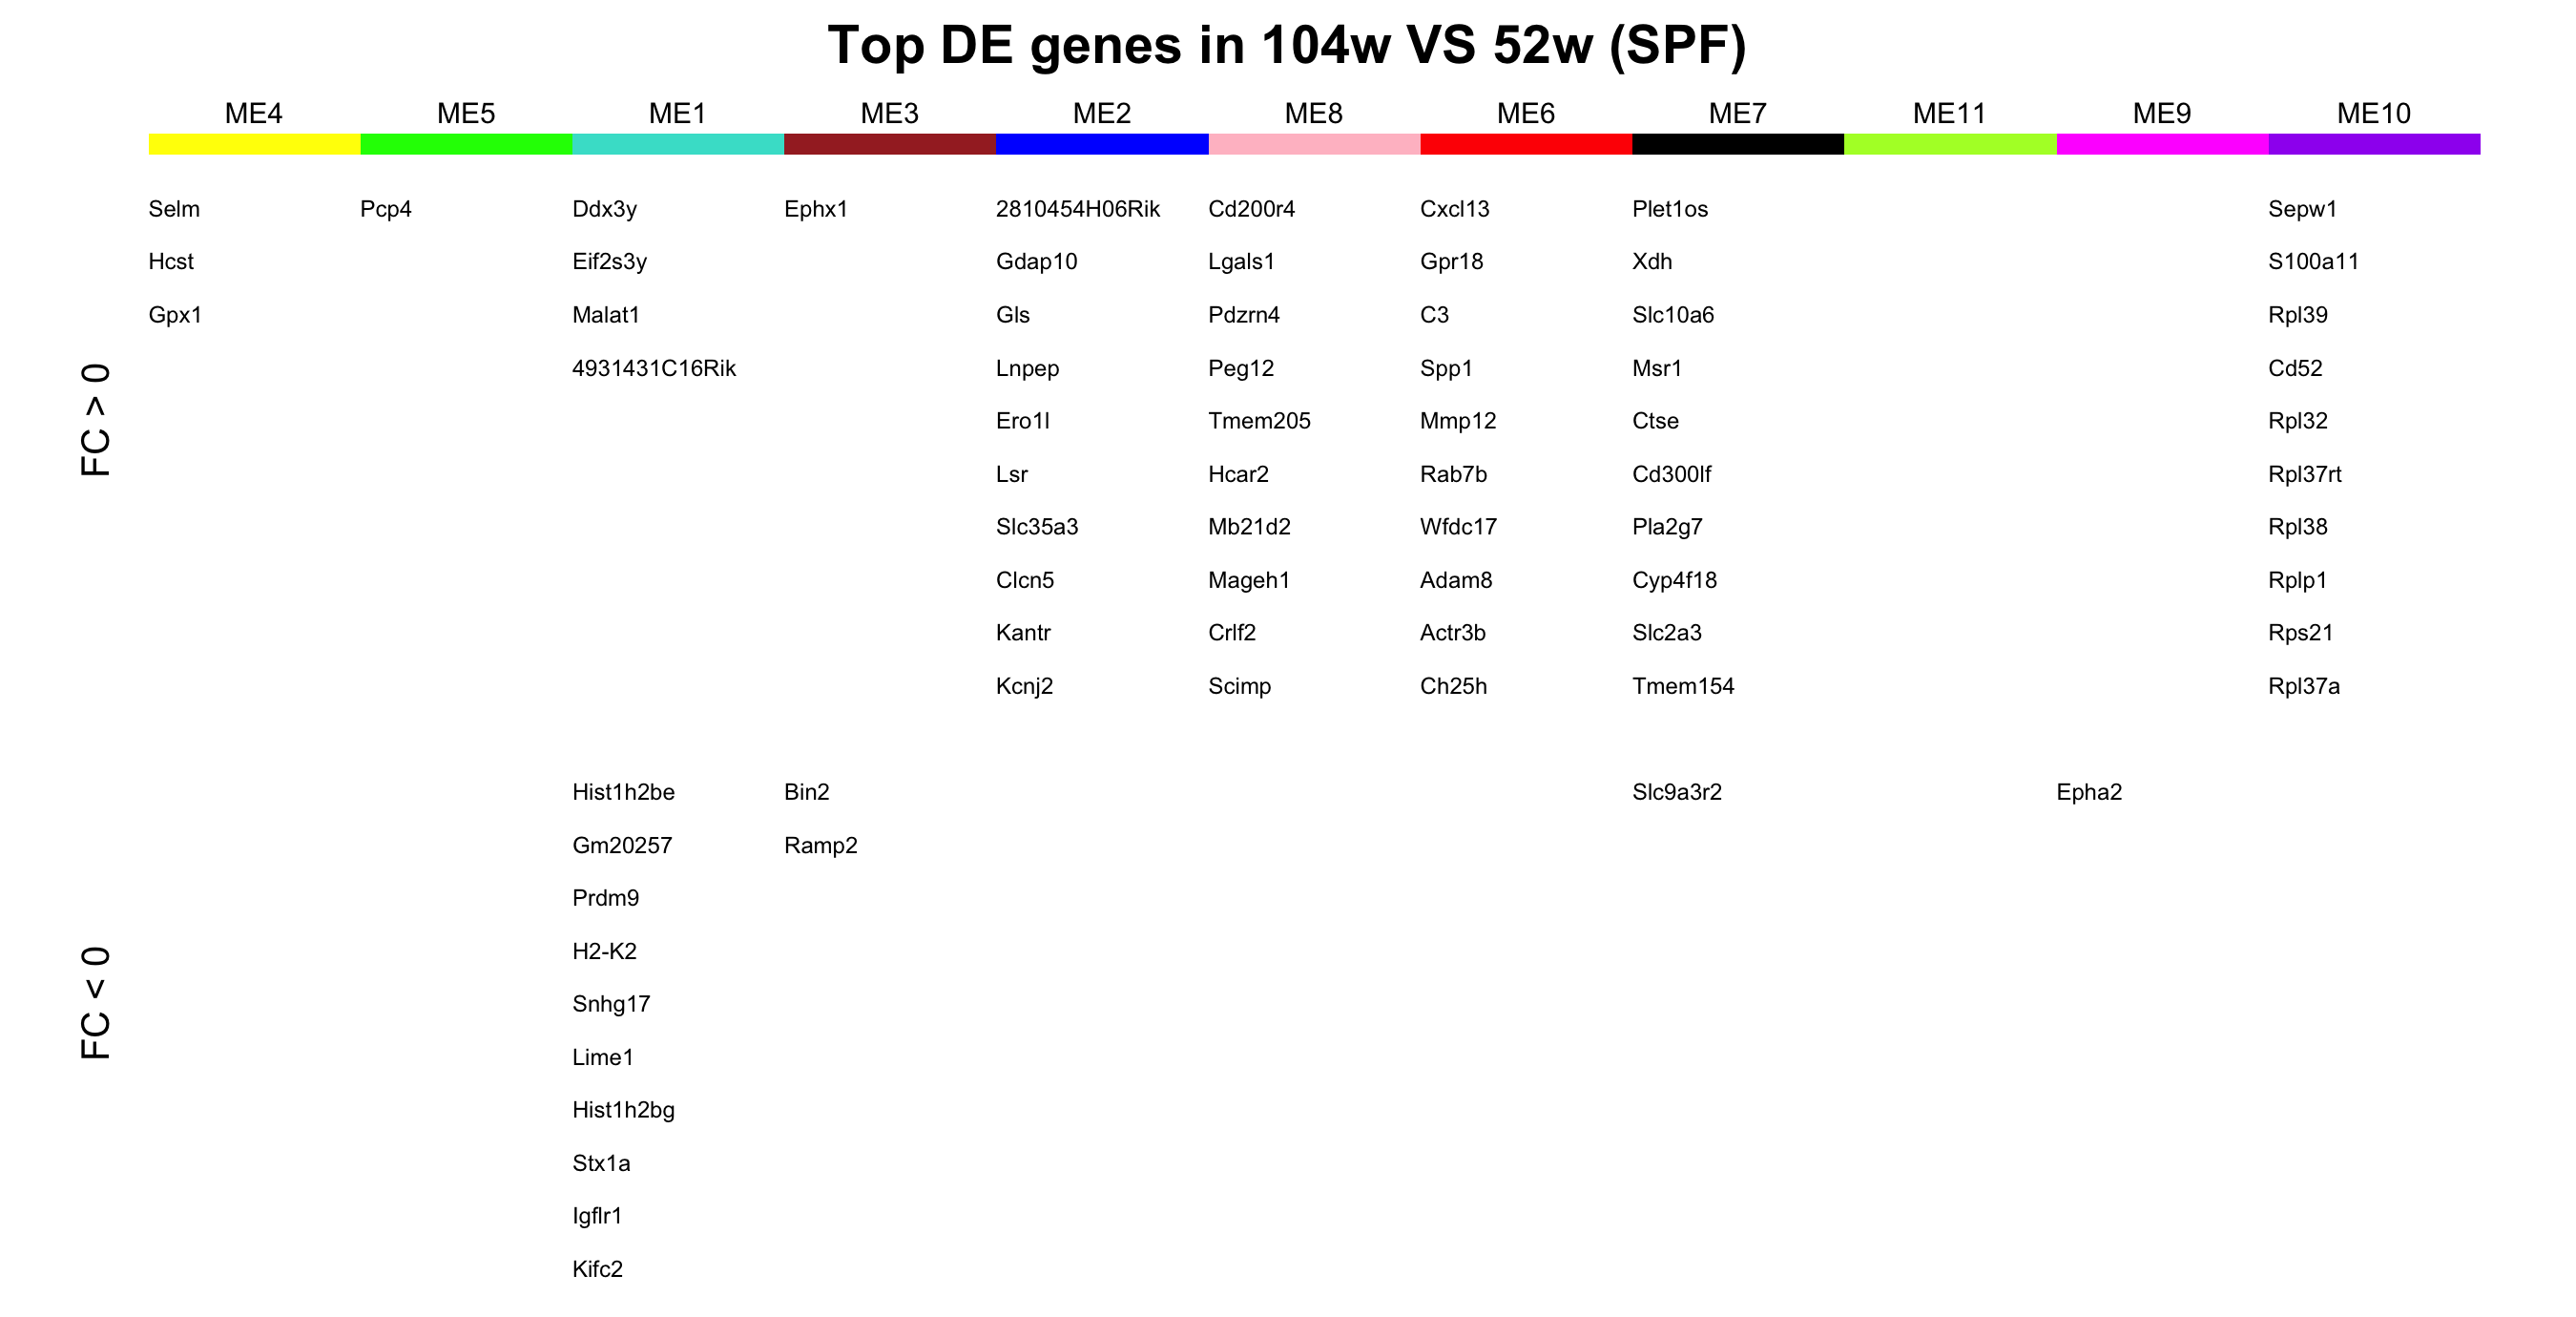

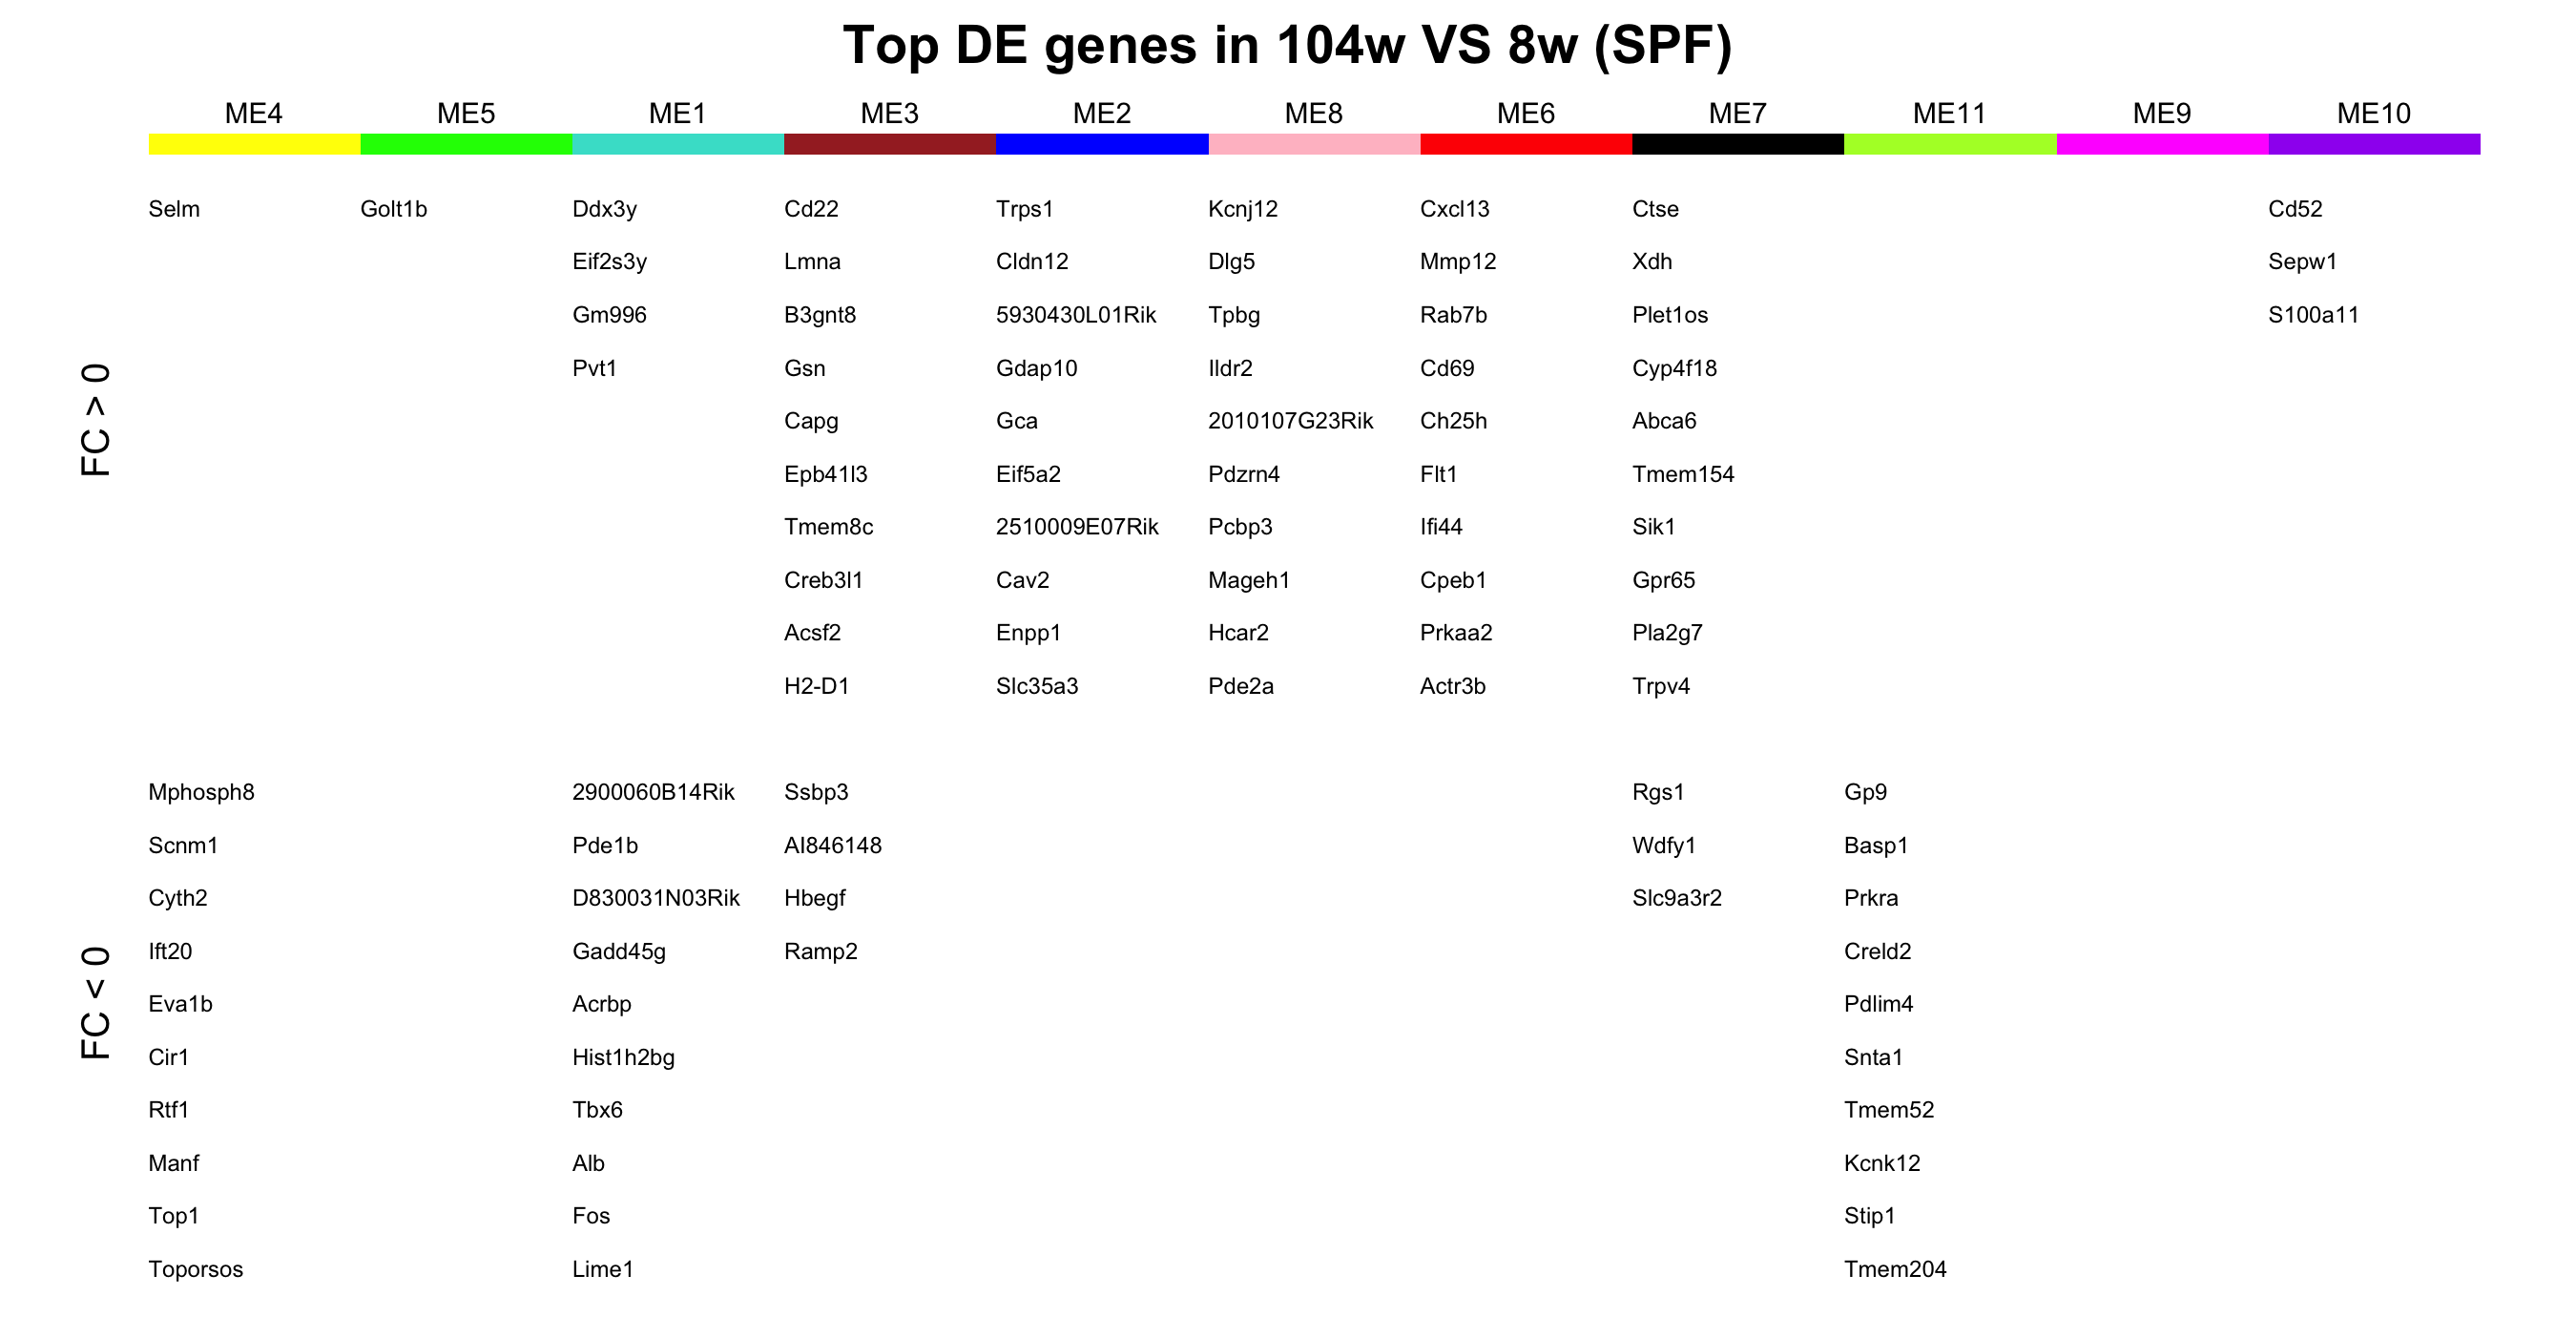

In [29]:
for(comp in comps){
    plot_top_deg_in_modules(age_type_deg$sign_fc_deg, comp, connected_gene_colors)
}
options(repr.plot.width=7, repr.plot.height=7)

# GO analysis

In [30]:
full_go_desc = age_type_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = age_type_deg$GO_wall[[1]][,"category"]
comp = colnames(age_type_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


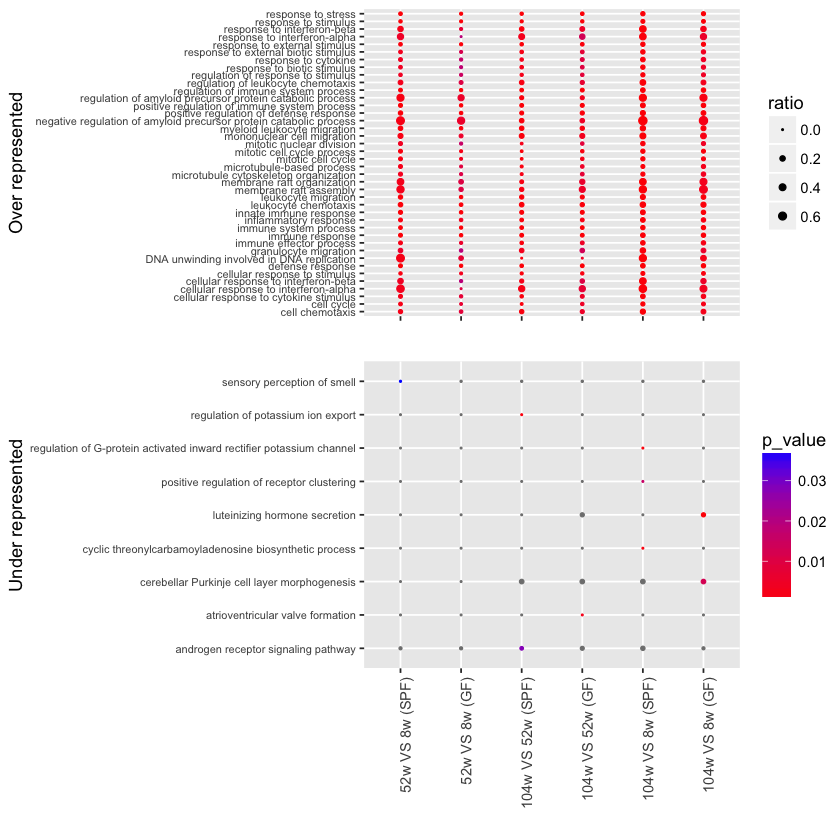

In [31]:
plot_top_go(age_type_deg,
            "BP",
            40)

Network based on description similarity

In [32]:
BP_network = create_GO_network(age_type_deg, "BP", BP_GO)

 | 52w VS 8w | 104w VS 52w | 104w VS 8w
--- | --- | --- | ---
SPF |  |  | 
GF  |  |  | 

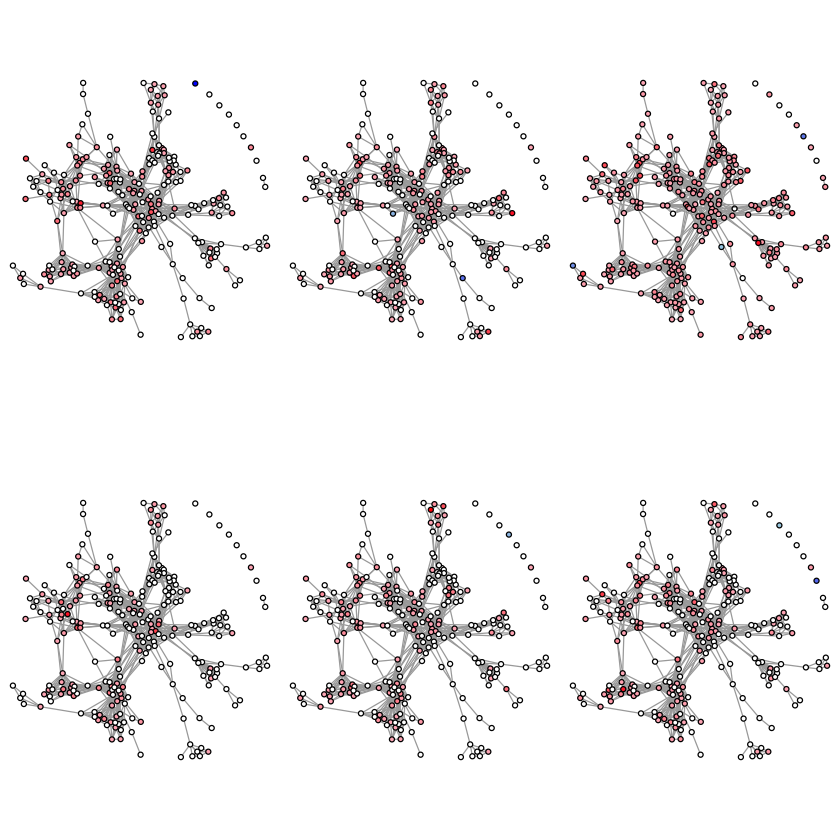

In [33]:
par(mfrow=c(2,3),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "52w VS 8w (SPF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (SPF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w (SPF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "52w VS 8w (GF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (GF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w (GF)", full_go_desc, plot_interactive = FALSE)

### 52w VS 8w (SPF)

In [34]:
col = get_GO_network_col(BP_network, "52w VS 8w (SPF)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_type/go/52w_VS_8w_SPF",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_type/go/52w_VS_8w_SPF.png)

GO Tree at "../results/dge/age-effect/age_type/go/52w_VS_8w_SPF.png"

### 52w VS 8w (GF)

In [35]:
col = get_GO_network_col(BP_network, "52w VS 8w (GF)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_type/go/52w_VS_8w_GF",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_type/go/104w_VS_52w_GF.png)

GO Tree at "../results/dge/age-effect/age_type/go/52w_VS_8w_GF.png"

### 104w VS 52w (SPF)

In [36]:
col = get_GO_network_col(BP_network, "104w VS 52w (SPF)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_type/go/104w_VS_52w_SPF",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_type/go/104w_VS_52w_SPF.png)

GO Tree at "../results/dge/age-effect/age_type/go/104w_VS_52w_SPF.png"

### 104w VS 52w (GF)

In [37]:
col = get_GO_network_col(BP_network, "104w VS 52w (GF)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_type/go/104w_VS_52w_GF",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_type_genes/go/104w_VS_52w_GF.png)

GO Tree at "../results/dge/age-effect/age_type/go/104w_VS_52w_GF.png"

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Using term, id as id variables


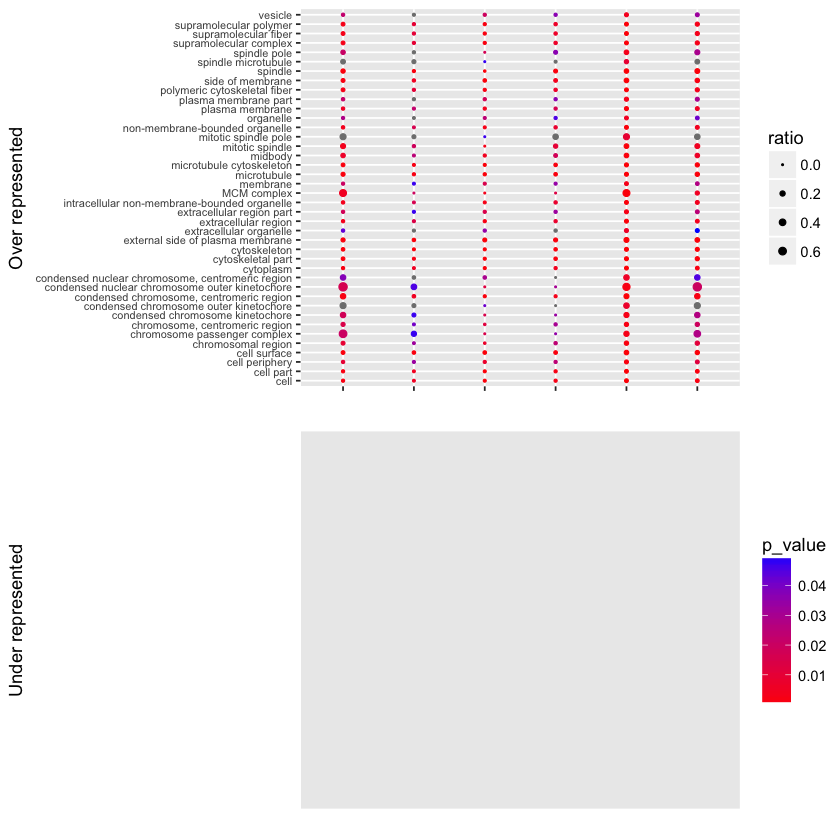

In [38]:
plot_top_go(age_type_deg,
            "CC",
            40)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


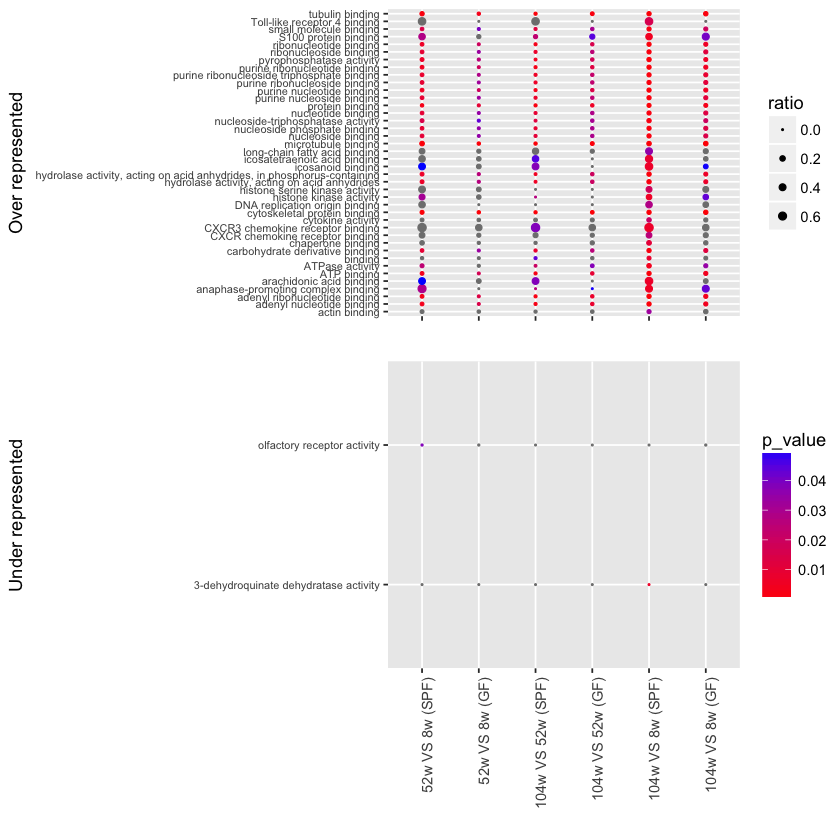

In [39]:
plot_top_go(age_type_deg,
            "MF",
            40)

# KEGG pathways

In [25]:
plot_kegg_pathways(age_type_deg$over_represented_KEGG[,"category"],
                   age_type_deg$fc_deg,
                   "../results/dge/age-effect/age_type/kegg/over_repr_kegg/")

ERROR: Error in `$<-.data.frame`(`*tmp*`, labels, value = c("", "", "", "", "", : replacement has 77 rows, data has 92


In [ ]:
plot_kegg_pathways(age_type_deg$under_represented_KEGG[,"category"],
                   age_type_deg$fc_deg,
                   "../results/dge/age-effect/age_type/kegg/under_repr_kegg/")

# SPF effect in aging

Question: Is there any genes that shows an increasing fold change in SPF with aging while not for GF?

| 52w vs 8w for SPF | 52w vs 8w for GF | 104w vs 52w for SPF | 104w vs 52w for GF | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != |  | != |  | 244
Set 2 | != | == | != | == | 92 


In [40]:
# set extractions
set1 = rownames(age_type_deg$fc_deg[!is.na(age_type_deg$fc_deg[,"52w VS 8w (SPF)"]) & !is.na(age_type_deg$fc_deg[,"104w VS 52w (SPF)"]),])
set2 = rownames(age_type_deg$fc_deg[!is.na(age_type_deg$fc_deg[,"52w VS 8w (SPF)"]) & is.na(age_type_deg$fc_deg[,"52w VS 8w (GF)"]) & !is.na(age_type_deg$fc_deg[,"104w VS 52w (SPF)"]) & is.na(age_type_deg$fc_deg[,"104w VS 52w (GF)"]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_type_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_type_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0

Gene number
Set 1 220        
Set 2  91

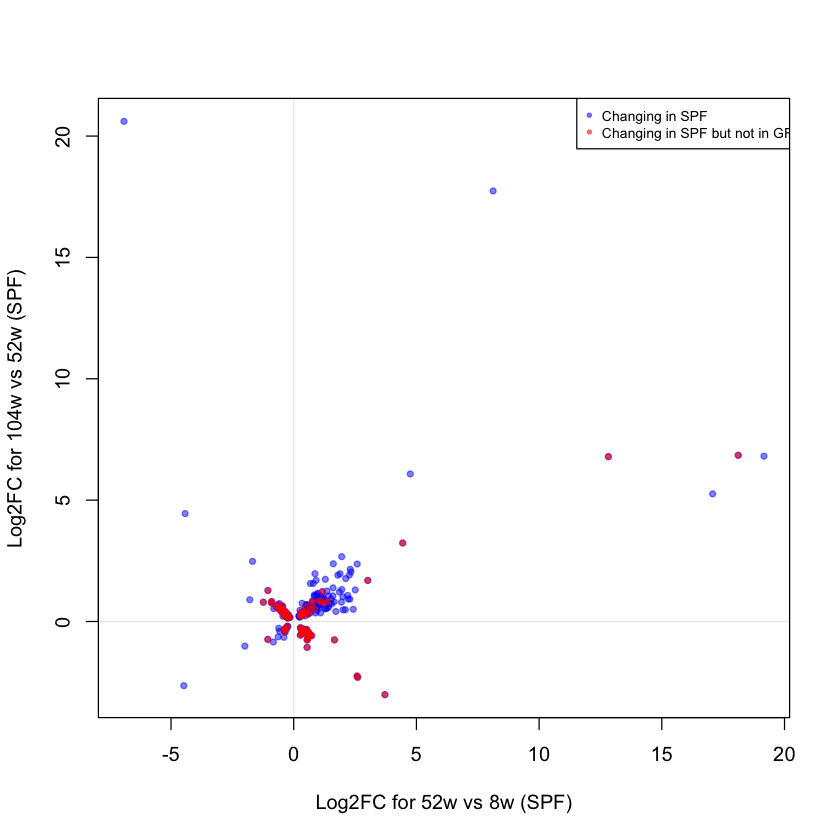

In [41]:
# plots of the differences
plot(set1_fc[,"52w VS 8w (SPF)"], set1_fc[,"104w VS 52w (SPF)"], xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)", pch = 20, col = rgb(0,0,1,alpha=0.5))
points(set2_fc[,"52w VS 8w (SPF)"], set2_fc[,"104w VS 52w (SPF)"], pch = 20, col = rgb(1,0,0,alpha=0.5))
legend("topright", pch = 20, col = c(rgb(0,0,1,alpha=0.5),rgb(1,0,0,alpha=0.5)), legend=c("Changing in SPF", "Changing in SPF but not in GF"), cex = 0.7)
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))

## Genes with differential expression with aging in SPF but not in GF (set2)

In [42]:
aging_SPF_diff = cbind(set2_fc[,"52w VS 8w (SPF)"], set2_fc[,"104w VS 52w (SPF)"])
colnames(aging_SPF_diff) = c("52w VS 8w (SPF)","104w VS 52w (SPF)")

### 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) > 0

[1] 28

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 21.858, df = 26, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9436093 0.9879760
sample estimates:
      cor 
0.9738524 



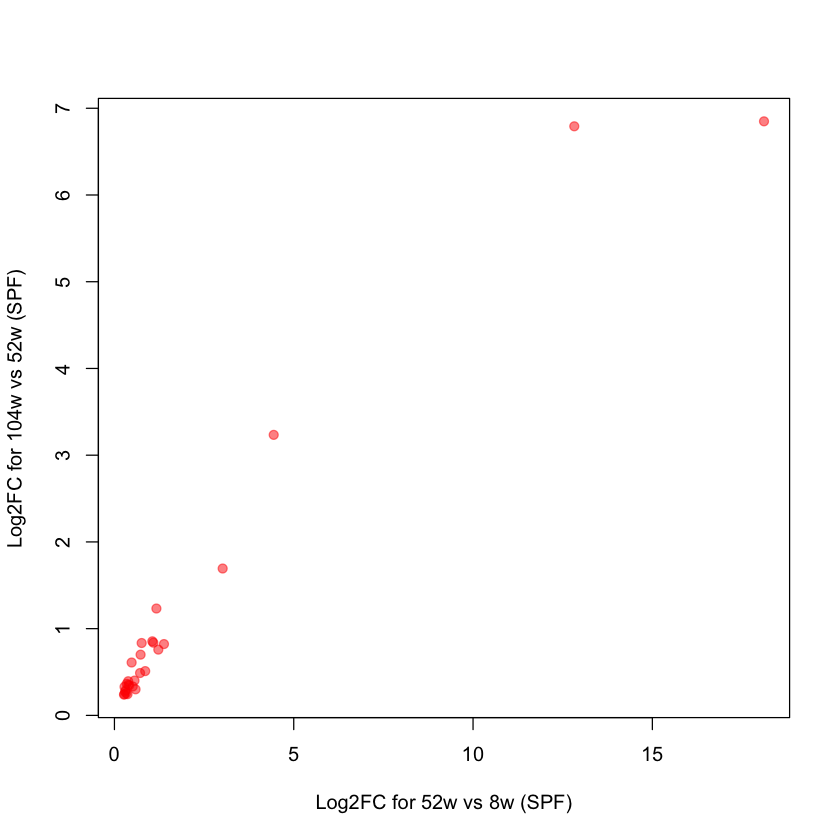

In [43]:
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) > 0
pos_1_pos_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]>0 & aging_SPF_diff[,"104w VS 52w (SPF)"]>0,]
investigate_gene_set(pos_1_pos_2)
plot(pos_1_pos_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

### 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) < 0

[1] 25

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -15.545, df = 23, p-value = 1.081e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9804861 -0.9003858
sample estimates:
       cor 
-0.9555577 



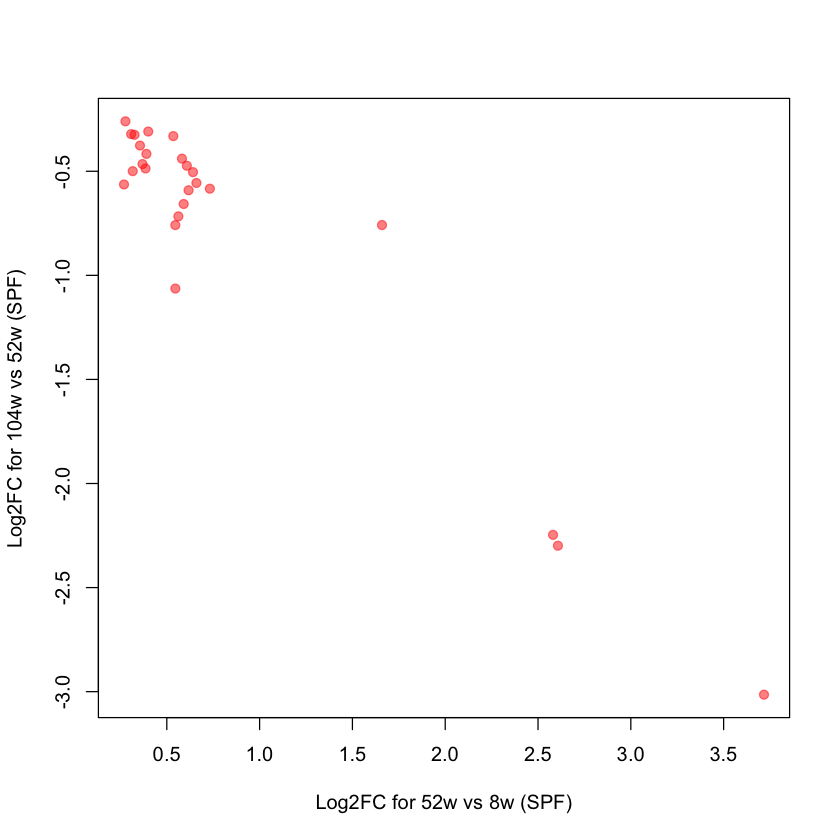

In [44]:
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) < 0
pos_1_neg_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]>0 & aging_SPF_diff[,"104w VS 52w (SPF)"]<0,]
investigate_gene_set(pos_1_neg_2)
plot(pos_1_neg_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

### 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) > 0

[1] 32

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -11.512, df = 30, p-value = 1.562e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9519558 -0.8090666
sample estimates:
       cor 
-0.9030072 



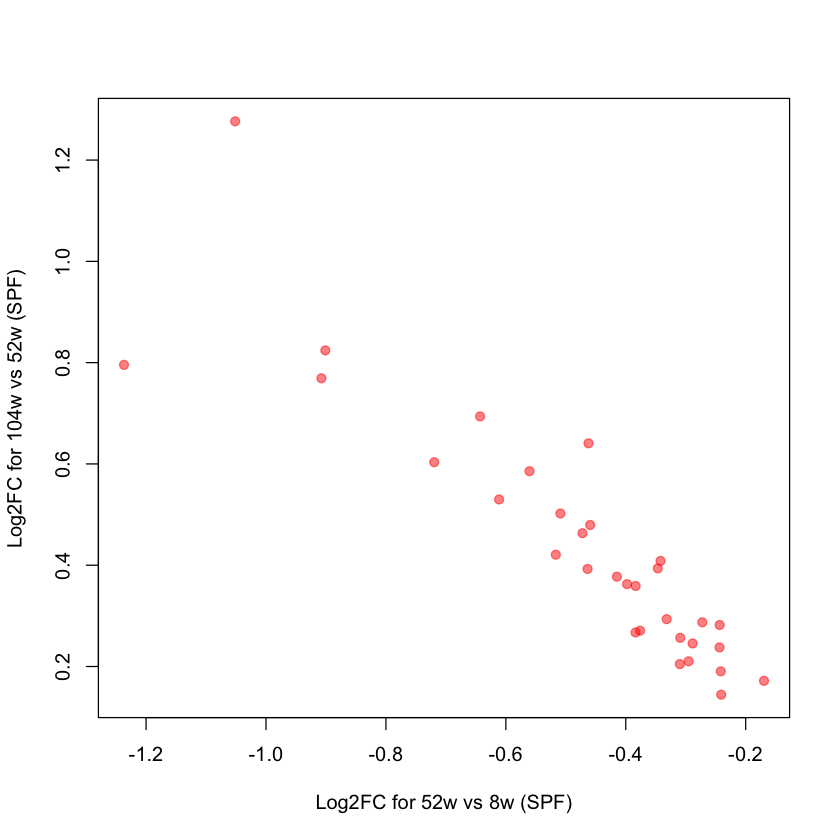

In [45]:
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) > 0
neg_1_pos_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]<0 & aging_SPF_diff[,"104w VS 52w (SPF)"]>0,]
investigate_gene_set(neg_1_pos_2)
plot(neg_1_pos_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

### 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) < 0

[1] 6

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 5.4385, df = 4, p-value = 0.005549
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5328604 0.9934268
sample estimates:
      cor 
0.9385478 



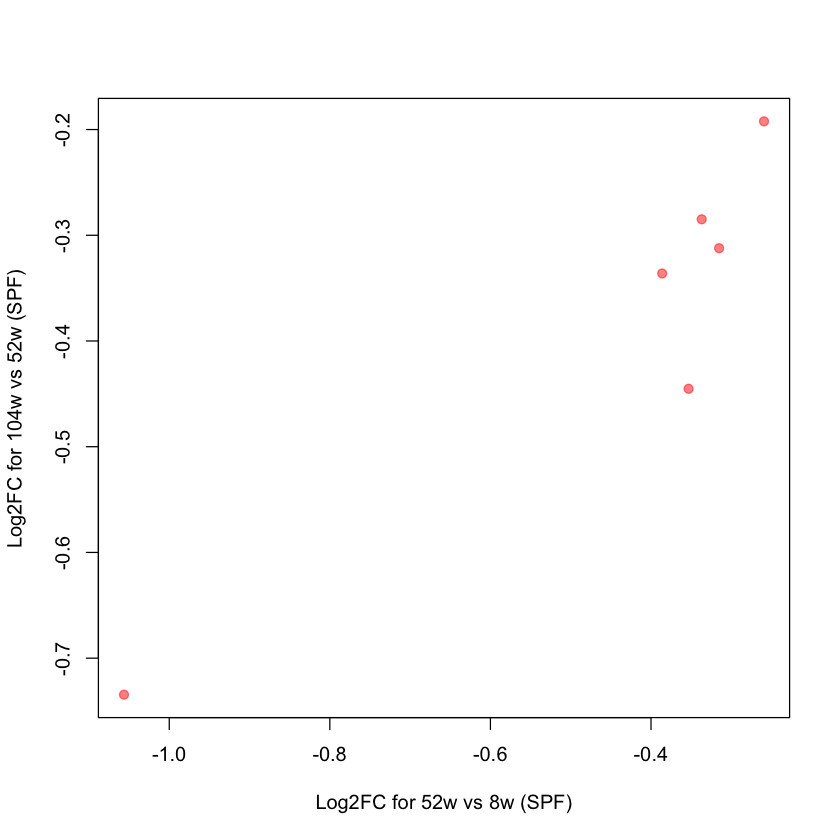

In [46]:
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) < 0
neg_1_neg_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]<0 & aging_SPF_diff[,"104w VS 52w (SPF)"]<0,]
investigate_gene_set(neg_1_neg_2)
plot(neg_1_neg_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

## Summary

![](../results/dge/age-effect/age_type/SPF_aging_genes.png)

In [47]:
#par(mfrow=c(2,2),mar=c(0,0,0,0))
## 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) > 0
#neg_1_pos_2_col = connected_gene_colors
#sum(names(neg_1_pos_2_col) %in% rownames(neg_1_pos_2))
#neg_1_pos_2_col[which(names(neg_1_pos_2_col) %in% rownames(neg_1_pos_2))] = module_nb + 1
#plot_net_with_layout(net, neg_1_pos_2_col, pal2, layout, add_legend = F)
## 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) > 0
#pos_1_pos_2_col = connected_gene_colors
#sum(names(pos_1_pos_2_col) %in% rownames(pos_1_pos_2))
#pos_1_pos_2_col[which(names(pos_1_pos_2_col) %in% rownames(pos_1_pos_2))] = module_nb + 1
#plot_net_with_layout(net, pos_1_pos_2_col, pal2, layout, add_legend = F)
## 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) < 0
#neg_1_neg_2_col = connected_gene_colors
#sum(names(neg_1_neg_2_col) %in% rownames(neg_1_neg_2))
#neg_1_neg_2_col[which(names(neg_1_neg_2_col) %in% rownames(neg_1_neg_2))] = module_nb + 1
#plot_net_with_layout(net, neg_1_neg_2_col, pal2, layout, add_legend = F)
## 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) < 0
#pos_1_neg_2_col = connected_gene_colors
#sum(names(pos_1_neg_2_col) %in% rownames(pos_1_neg_2))
#pos_1_neg_2_col[which(names(pos_1_neg_2_col) %in% rownames(pos_1_neg_2))] = module_nb + 1
#plot_net_with_layout(net, pos_1_neg_2_col, pal2, layout, add_legend = F)